# SC1015 FEL1 Group 2 - *Anime Score Predictor*

## Import and Introduction

##### Done by Jordan Choi, Kye Yong and Yu Kai
### https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset/data

### Variables Used & Description
<hr>

### Dataset Description
#### Primary Dataset *"anime-dataset-2023"*
Contains anime information

<table style="width: 100%; text-align: left">
    <tr>
        <th>Field Name</th>
        <th>Field Description</th>
        <th>Clean Up Approach</th>
        <th>Status</th>
        <th>Remarks</th>
    </tr>
    <tr>
        <td>anime_id</td>
        <td>Unique ID for each anime.</td>
        <td>Same as Raw</td>
        <td>✔</td>
        <td></td>
    </tr>
    <tr>
        <td>Name</td>
        <td>The name of the anime in its original language.</td>
        <td>Same as Raw.</td>
        <td>✔</td>
        <td>Use as Primary Name out of 3 Different Name Data Columns. This data column contains unique values for all rows</td>
    </tr>
    <tr>
        <td>English Name</td>
        <td>The English name of the anime.</td>
        <td>Rows with duplicated values with "Name" -> 1<br>"UNKNOWN" -> None<br>Unique Values -> Kept as it is</td>
        <td>✔</td>
        <td>Can be used to find out whether the existence of an English Name affects the Score and other values</td>
    </tr>
    <tr>
        <td>Other Name</td>
        <td>Other names or titles of the anime in different languages.</td>
        <td>Excluded from Cleaned Data Frame.</td>
        <td>✔</td>
        <td>Majority of values are in Japanese Hiragana. We lack the proficiency to process these data, and is unmeaningful.</td>
    </tr>
    <tr>
        <td>Score</td>
        <td>The score or rating given to the anime.</td>
        <td>9213 UNKNOWN values, out of 15206 remain after cleaning up from other columns. Applied Multivariate Imputation by Chained Equations (MICE) to fill these missing data.</td>
        <td>✔</td>
        <td>One of the main objective of our project. Find out what can achieve a high score.</td>
    </tr>
    <tr>
        <td>Genres</td>
        <td>The genres of the anime, separated by commas.</td>
        <td>Separated from the main, cleansed data frame, can be joined back. Applied Multi-Label Binarization to indicate the Genres of the title - since a title can belong to than 1 Genres.<br><br> "1" - True<br>"0" - False</td> 
        <td>✔</td>
        <td>genres_df | 4929 "UNKNOWN" Genres - will be 0s for all genres. Can be used to find out which genres are the most successful titles.</td>
    </tr>
    <tr>
        <td>Synopsis</td>
        <td>A brief description or summary of the anime's plot.</td>
        <td>4535 rows, out of 15206 titles after cleaning up has no description, indicated by "No description available for this anime." -> Transformed to "NA" value</td>
        <td>✔</td>
        <td>Useful to check if existence of a synopsis - using language models, affects the probability of success for an anime title.</td>
    </tr>
    <tr>
        <td>Type</td>
        <td>The type of the anime (e.g., TV series, movie, OVA, etc.).</td>
        <td>9699 titles(rows) of type "Music (2686)", "Movie", "UNKNOWN (74)" and "Special" are dropped from the data frame, as it is not our project focus. 15206 titles(rows) remains - TV, OVA and ONA.</td>
        <td>✔</td>
        <td>The method of release (TV Air, Original Video Animation (Home Video Format) or Original Net Animation (Direct Online)</td>
    </tr>
    <tr>
        <td>Episodes</td>
        <td>The number of episodes in the anime.</td>
        <td>Replace UNKNOWN Episodes (611) value with (Global/Overall Average No. Episodes per Week * No. of Running Weeks). Have to obtain the average number of released episodes/week, from other titles first. Duration may not be available, for such cases: will try to apply KNN.</td>
        <td>TO DO</td>
        <td>Can consider to categorize them into ranges, since the exact number of episodes may not be meaningful</td>
    </tr>
    <tr>
        <td>Aired</td>
        <td>The dates when the anime was aired.</td>
        <td>Raw string "MMM DD YYYY to MMM DD YYYY" are split into Start Date and End Date, in DateTime format.<br> 915 Titles with "Not Available" Aired Value are replaced with "NaT".<br>Some End Dates are "?", will also be replaced with "NaT" - likely indicates that anime are still airing or end date are not recorded.</td>
        <td>✔</td>
        <td>Can consider to categorize them into ranges, since the exact number of episodes may not be meaningful</td>
    </tr>
    <tr>
        <td>Premiered</td>
        <td>The season and year when the anime premiered.</td>
        <td>9700/15206 Titles are "UNKNOWN". Will input these UNKNOWN values, using the START DATE when available to compute the season and year.</td>
        <td>TO DO</td>
        <td></td>
    </tr>
    <tr>
        <td>Status</td>
        <td>The status of the anime (e.g., Finished Airing, Currently Airing, etc.)</td>
        <td>Text Categorical Value are transformed to Numerical Categorical Value to represent each status.<br><br>0 - Currently Airing<br>1 - Finished Airing<br>2 - Not yet aired</td>
        <td>✔</td>
        <td></td>
    </tr>
    <tr>
        <td>Producers</td>
        <td>The production companies or producers of the anime.</td>
        <td>Separated from the main, cleansed data frame, can be joined back. Applied Multi-Label Binarization to indicate the Producers of the title - since a title can be produced by a collaboration of producers<br><br> "1" - Produced by the Company<br>"0" - Not Produced By the Company</td>
        <td>✔</td>
        <td>producers_df | 7306/15206 titles with UNKNOWN value are retained.</td>
    </tr>
    <tr>
        <td>Licensors</td>
        <td>The licensors of the anime (e.g., streaming platforms).</td>
        <td>Excluded from Cleaned Data Frame.<br>11666/15206 titles are "UNKNOWN", it is unlikely this column can provide any valuable insights on our problem. This column will be expelled from the data since majority of the values are UNKNOWN.</td>
        <td>✔</td>
        <td></td>
    </tr>
    </tr>
    <tr>
        <td>Studios</td>
        <td>The animation studios that worked on the anime.</td>
        <td>Separated from the main, cleansed data frame, can be joined back. Applied Multi-Label Binarization to indicate the Studios of the title - since a title can be produced by a collaboration of Studios<br><br> "1" - Drawn by the Company<br>"0" - Not Drawn By the Company</td>
        <td>✔</td>
        <td>studios_df | 5470/15206 titles with UNKNOWN value are retained. Since the studios who produced the anime titles could be an important factor to determine the success of an anime title, this column will be retained. Titles can be a collaboration of more than 1 studios, hence, we will follow a similar approach to Genres. Multi-label binarization will be employed. A unique column label will be created for each studio. Binary values (0 or 1) will be used to indicate if the title belongs to the respective studio.</td>
    </tr>
    <tr>
        <td>Source</td>
        <td>The source material of the anime (e.g., manga, light novel, original).</td>
        <td>Converted the Categorical Data Field - "Source" from Text Representation to Numerical Representation, Represented under "Source Code"<br><br>
            0	4-koma manga<br>
            1	Book<br>
            2	Card game<br>
            3	Game<br>
            4	Light novel<br>
            5	Manga<br>
            6	Mixed media<br>
            7	Music<br>
            8	Novel<br>
            9	Original<br>
            10	Other<br>
            11	Picture book<br>
            12	Radio<br>
            13	Unknown<br>
            14	Visual Novel<br>
            15	Web manga<br>
            16	Web novel<br>
        </td>
        <td>✔</td>
        <td>2117/15206 titles with UNKNOWN source values. </td>
    </tr>
    <tr>
        <td>Duration</td>
        <td>The duration of each episode.</td>
        <td>Converted all duration runtime of the titles to minutes</td>
        <td>✔</td>
        <td>416 titles with "UNKNOWN" value for Duration are converted to NaN value.</td>
    </tr>
    <tr>
        <td>Rating</td>
        <td>The age rating of the anime.</td>
        <td>Converted the Categorical Data Field - "Rating" from Text Representation to Numerical Representation, Represented under "Rating Code"<br><br>
            0	G - All Ages<br>
            1	PG - Children<br>
            2	PG-13 - Teens 13 or older<br>
            3	R - 17+ (violence & profanity)<br>
            4	R+ - Mild Nudity<br>
            5	Rx - Hentai<br>
            6	Unknown (Removed)</td>
        <td>✔</td>
        <td>669 UNKNOWN values retained</td>
    </tr>
    <tr>
        <td>Rank</td>
        <td>The rank of the anime based on popularity or other criteria.</td>
        <td>UNKNOWN values are filled with Median Rank Values. Titles with Rank 0 are appended to the end of the ranking in running order.</td>
        <td>✔</td>
        <td>1797/15206 Unknowns, 80 Rank 0 (Invalid). </td>
    </tr>
    <tr>
        <td>Popularity</td>
        <td>The popularity rank of the anime.</td>
        <td>Titles with Rank 0 are appended to the end of the ranking in running order</td>
        <td>✔</td>
        <td>80 values with "UNKNOWN" </td>
    </tr>
    <tr>
        <td>Favorites</td>
        <td>The number of times the anime was marked as a favorite by users.</td>
        <td>No cleaning required. Left as it is.</td>
        <td>✔</td>
        <td>0 Favorites means there are nobody who added the title as favorites.</td>
    </tr>
    <tr>
        <td>Scored By</td>
        <td>The number of users who scored the anime.</td>
        <td>Converted to Int. Replaced 5512 rows with Unknowns using values computed from MICE, for both Score and Scored By, using other columns with numerical data that possess high correlation with Score and Scored By, like Members, Favourites and Popularity.</td>
        <td>✔</td>
        <td></td>
    </tr>
    <tr>
        <td>Members</td>
        <td>The number of members who have added the anime to their list on the platform.</td>
        <td>No cleaning required. Left as it is.</td>
        <td>✔</td>
        <td>0 members means there are no members who added the anime to their list.</td>
    </tr>
    <tr>
        <td>Image URL</td>
        <td>The URL of the anime's image or poster.</td>
        <td>No cleaning required. Left as it is.</td>
        <td>✔</td>
        <td>Kept in case we want to use Machine Learning to see how the poster style may affect the popularity, and other things we want to find out.</td>
    </tr>
</table>
<hr>

In [1]:
# Import the Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from datetime import timedelta

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
#from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer
from sklearn.impute import IterativeImputer


def convertDuration(duration):
    if pd.isnull(duration) or "Unknown" in duration:
        return np.nan # For missing or unknown duration
    hours = re.search(r'(\d+)\s*hr', duration) # Hours
    mins = re.search(r'(\d+)\s*min', duration) # Mins
    
    totalMins = 0
    if hours:
        totalMins += int(hours.group(1)) * 60 # Convert Hours to Mins
    if mins:
        totalMins += int(mins.group(1)) # Add mins
    return totalMins


# Import & Clean "Anime Dataset 2023" Dataset
#anime_data = pd.read_csv("dataset/anime-dataset-2023.csv")
anime_data = pd.read_csv("anime-dataset-2023.csv")
anime_data.head(len(anime_data))

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


In [2]:
# Check the basic information of the dataset.
print(anime_data.dtypes)

anime_id         int64
Name            object
English name    object
Other name      object
Score           object
Genres          object
Synopsis        object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Licensors       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
Image URL       object
dtype: object


## Data Cleanup

##### Cleaning - Unnecessary Columns

In [3]:
# Copy the raw data into a new dataframe for cleaning.
anime_cleaned_df = anime_data.copy()

# Drop unnecessary columns that are irrelevant to our analysis or unmeaningful due to Unknown values
# - "Other Name", "Premiered", "Licensors" 
anime_cleaned_df = anime_cleaned_df.drop(['Other name', 'Licensors'], axis=1)

# Check if the columns are dropped successfully.
anime_cleaned_df.dtypes

anime_id         int64
Name            object
English name    object
Score           object
Genres          object
Synopsis        object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
Image URL       object
dtype: object

##### Cleaning - "Type" Column

In [4]:
# Drop rows with "Music", "Movie", "Special" value of Type. Retaining only "TV", "ONA" and "OVA" - which are our focus of this project.
# Remove these rows by filtering those values of Type using "isin()"

# Filter the DataFrame to exclude rows where the "Type" column is "Movie", "Music", or "Special"
anime_cleaned_df = anime_cleaned_df[~anime_cleaned_df['Type'].isin(['Movie', 'Music', 'Special', 'UNKNOWN'])]

# Check if rows are dropped successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Type'].isin(['Movie', 'Music', 'Special', 'UNKNOWN'])]
filtered_df

anime_cleaned_df.describe()

,anime_id,Popularity,Favorites,Members
count,15206.000000,15206.000000,15206.000000,1.520600e+04
mean,28358.823491,11516.737472,649.390833,5.149600e+04
std,18396.556175,7524.147345,5436.525592,1.912491e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,8194.250000,4963.500000,0.000000,2.390000e+02
50%,33774.000000,10624.000000,3.000000,1.943500e+03
75%,45464.750000,17985.250000,40.000000,1.519250e+04
max,55733.000000,24723.000000,217606.000000,3.744541e+06


##### Cleaning - "English name" Column

In [5]:
# Since most values in 'English names' are the same as the "Name" column, replace duplicate values with "NaN" value.
anime_cleaned_df['English name'] = anime_cleaned_df.apply(lambda row: 1 if row['English name'] == row['Name'] else row['English name'], axis=1)

In [ ]:
# Replace "Unknown" values with "NaN" value.
anime_cleaned_df['English name'].replace("UNKNOWN", None, inplace=True)

In [7]:
# Verify if "UNKNOWN" values are replaced by "NaN" value successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['English name'] == 'UNKNOWN']
filtered_df

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL


In [8]:
# Check if the 9213 Unknown values for Score and Scored By are equal - that means 
filtered_df = anime_cleaned_df[anime_cleaned_df['Score'] == 'UNKNOWN']
filtered_df2 = anime_cleaned_df[anime_cleaned_df['Scored By'] == 'UNKNOWN']
are_equal = filtered_df.equals(filtered_df2)
print(are_equal)

True


##### Cleaning - "Score" Column

In [9]:
type(anime_cleaned_df)

pandas.core.frame.DataFrame

In [10]:
# Set Unknown Values of Score to "NaN" first.

In [11]:
anime_cleaned_df['Score'] = anime_cleaned_df['Score'].replace("Unknown", np.nan)
anime_cleaned_df['Score'] = pd.to_numeric(anime_cleaned_df['Score'], errors='coerce')

In [12]:
# Verify if "UNKNOWN" values are replaced by "NaN" value successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Score'] == 'UNKNOWN']
filtered_df

### NEED TO REPLACE UNKNOWN VALUES!

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL


##### Cleaning - "Genre" Column - Use Multi Label Binarization

In [13]:
# Split the genre into a list
anime_cleaned_df['Genres List'] = anime_cleaned_df['Genres'].apply(lambda x: x.split(", "))

# Initialize the MultiLabelBinarizer and fit into the list
mlb = MultiLabelBinarizer()
encoded_genres = mlb.fit_transform(anime_cleaned_df['Genres List'])

# DataFrame for Encoded Genres 
genres_df = pd.DataFrame(encoded_genres, columns=mlb.classes_, index=anime_cleaned_df.index)

# Drop the UNKNOWN category from genres_df
genres_df = genres_df.drop(['UNKNOWN'], axis=1, errors='ignore')

# Add 'anime_id' and 'Name' to genres_df to maintain a key and readable reference for merging
genres_df = genres_df.join(anime_cleaned_df['anime_id'])
genres_df = genres_df.join(anime_cleaned_df['Name'])

# Drop Genres List and Genres from cleansed dataframe.
# Not working -anime_cleaned_df.drop(columns=['Genres','Genres List'])
anime_cleaned_df = anime_cleaned_df.drop(['Genres', 'Genres List'], axis=1)

# Merge into the original anime dataframe using join.
#anime_cleaned_df = anime_cleaned_df.join(genres_df)

# Reorganize the Genres Dataframe Column Order.
new_column_order = ['anime_id', 'Name']

# Append remaining columns that are not explicitly ordered
remaining_columns = [col for col in genres_df.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

genres_df = genres_df[new_column_order]

In [14]:
# Loop through the genre columns with binary values - check if they are classes generated by mlb.
genre_columns = [col for col in genres_df.columns if col in mlb.classes_]  # mlb.classes_ contains the genre names

# Replace NaN values in genre columns with 0
genres_df[genre_columns] = genres_df[genre_columns].fillna(0)

# Convert genre columns to int64
genres_df[genre_columns] = genres_df[genre_columns].astype('int64')

print(anime_cleaned_df.dtypes)
print(genres_df.dtypes)

anime_id          int64
Name             object
English name     object
Score           float64
Synopsis         object
Type             object
Episodes         object
Aired            object
Premiered        object
Status           object
Producers        object
Studios          object
Source           object
Duration         object
Rating           object
Rank             object
Popularity        int64
Favorites         int64
Scored By        object
Members           int64
Image URL        object
dtype: object
anime_id          int64
Name             object
Action            int64
Adventure         int64
Avant Garde       int64
Award Winning     int64
Boys Love         int64
Comedy            int64
Drama             int64
Ecchi             int64
Erotica           int64
Fantasy           int64
Girls Love        int64
Gourmet           int64
Hentai            int64
Horror            int64
Mystery           int64
Romance           int64
Sci-Fi            int64
Slice of Life     int64
Sp

In [15]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

##### Cleaning - "Synopsis" Column - Replace "No description available for this anime." with NA value

In [16]:
anime_cleaned_df['Synopsis'] = anime_cleaned_df['Synopsis'].replace("No description available for this anime.", pd.NA)

In [17]:
# Verify if "UNKNOWN" values are replaced by "NA" value successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Synopsis'] == "No description available for this anime."]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL


In [18]:
# Check anime titles with "UNKNOWN" numbers of episodes.
filtered_df = anime_cleaned_df[anime_cleaned_df['Episodes'] == "UNKNOWN"]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
11,21,One Piece,1,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,"Oct 20, 1999 to ?",fall 1999,Currently Airing,"Fuji TV, TAP, Shueisha",Toei Animation,Manga,24 min,PG-13 - Teens 13 or older,55.0,20,198986,1226493.0,2168904,https://cdn.myanimelist.net/images/anime/6/732...
211,235,Detective Conan,Case Closed,8.17,"Shinichi Kudou, a high school student of astou...",TV,UNKNOWN,"Jan 8, 1996 to ?",winter 1996,Currently Airing,"Yomiuri Telecasting, TMS-Kyokuchi, Shogakukan",TMS Entertainment,Manga,25 min,PG-13 - Teens 13 or older,382.0,653,13964,154061.0,334559,https://cdn.myanimelist.net/images/anime/7/751...
871,966,Crayon Shin-chan,Shin Chan,7.77,There is no such thing as an uneventful day in...,TV,UNKNOWN,"Apr 13, 1992 to ?",spring 1992,Currently Airing,TV Asahi,Shin-Ei Animation,Manga,21 min,G - All Ages,972.0,2228,1178,39023.0,79676,https://cdn.myanimelist.net/images/anime/10/59...
1093,1199,Nintama Rantarou,None,7.07,"Taking place in the Sengoku Period, Rantarou, ...",TV,UNKNOWN,"Apr 10, 1993 to ?",spring 1993,Currently Airing,NHK,Ajia-do,Manga,10 min,G - All Ages,3681.0,6925,68,2346.0,7180,https://cdn.myanimelist.net/images/anime/6/740...
1787,1960,Sore Ike! Anpanman,None,6.53,"One night, a Star of Life falls down the chimn...",TV,UNKNOWN,"Oct 3, 1988 to ?",fall 1988,Currently Airing,"Sotsu, Nippon Television Network",TMS Entertainment,Picture book,24 min,PG - Children,6222.0,8982,25,1146.0,3545,https://cdn.myanimelist.net/images/anime/1902/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24889,55720,Tensura × Genyoha,None,NaN,A collaboration anime between Genjitsu no Yoha...,ONA,UNKNOWN,"Jun 21, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Original,Unknown,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1615/...
24890,55721,See You on Our Veranda,None,NaN,<NA>,ONA,UNKNOWN,2023 to ?,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web novel,6 min,PG - Children,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/img/sp/icon/apple-...
24891,55722,No More Princes,None,NaN,html.serialization_informationFIN.\r\nジャンル\r\n...,ONA,UNKNOWN,2023 to ?,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web novel,5 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/img/sp/icon/apple-...
24892,55723,The Forgotten Princess Just Wants Peace,None,NaN,I'm the daughter of a Duke?!\r\nWhile locked u...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web novel,4 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1887/...


In [19]:
# Clean Up "Aired" 

# Replace "Not Available" to "NaT"
anime_cleaned_df['Aired'] = anime_cleaned_df['Aired'].replace("Not available", pd.NaT)

# Split the Start and End Date into a new corresponding column Start Date and End Date based on the " to " separator
anime_cleaned_df[['Start Date','End Date']] = anime_cleaned_df['Aired'].str.split(' to ', expand=True)

# Convert Start Date & End Date to DateTime Format and coerce errors for Invalid Dates
anime_cleaned_df['Start Date'] = pd.to_datetime(anime_cleaned_df['Start Date'], errors = 'coerce')
anime_cleaned_df['End Date'] = pd.to_datetime(anime_cleaned_df['End Date'], errors = 'coerce')

# Anime titles with Partial Dates
# Extract and Process Anime Titles with Only Year Values
anime_cleaned_df['Start Date'] = anime_cleaned_df['Start Date'].fillna(anime_cleaned_df['Aired'].str.extract(r'(\d{4})')[0])
anime_cleaned_df['Start Date'] = pd.to_datetime(anime_cleaned_df['Start Date'], format='%Y', errors='coerce')

# Code to join for analysis.
# combined_df = anime_cleaned_df.merge(genres_df, on='anime_id', how='left')

In [20]:
#pd.set_option('display.max_rows', None)
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...",Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,"Apr 4, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min per ep,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT
24895,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT
24900,55731,Wu Nao Monu,None,NaN,<NA>,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,2023-07-04,NaT
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT


##### Cleaning - "Status" Column - Replace current "Categorical Data" into numerical form to represent each category. 0 = Currently Airing, 1 = Finished Airing, 2 = Not Yet Aired

In [21]:
# Initialize Label Encoder from sklearn
label_encoder = LabelEncoder()
anime_cleaned_df['Status Code'] = label_encoder.fit_transform(anime_cleaned_df['Status'])


In [22]:
print(label_encoder.classes_)

['Currently Airing' 'Finished Airing' 'Not yet aired']


In [23]:
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...",Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,"Apr 4, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min per ep,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1
24895,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1
24900,55731,Wu Nao Monu,None,NaN,<NA>,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,2023-07-04,NaT,2
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2


##### Cleaning - "Producers" Column, Use Multi Label Binarization to represent the producers for each titles through 1 and 0s.

In [24]:
# Can drop the following columns since it is already re-processed.
#anime_cleaned_df = anime_cleaned_df.drop(['Genres', 'Status', 'Genres List'], axis=1)

### Consider to separate "Not yet aired" data from the Main Dataframe, since we're not interested to analyse those.

In [25]:
# Split the genre into a list
anime_cleaned_df['Producers_List'] = anime_cleaned_df['Producers'].apply(lambda x: x.split(", "))

# Initialize the MultiLabelBinarizer and fit into the list
mlb = MultiLabelBinarizer()
encoded_producers = mlb.fit_transform(anime_cleaned_df['Producers_List'])

# DataFrame for Encoded Genres 
producers_df = pd.DataFrame(encoded_producers, columns=mlb.classes_, index=anime_cleaned_df.index)

# Drop the UNKNOWN category from producers_df
#producers_df = producers_df.drop(['UNKNOWN'], axis=1, errors='ignore')

# Add 'anime_id' and 'Name' to producers_df to maintain a key and readable reference for merging
producers_df = producers_df.join(anime_cleaned_df['anime_id'])
producers_df = producers_df.join(anime_cleaned_df['Name'])

# Drop Genres List and Genres from cleansed dataframe.
# Not working - anime_cleaned_df.drop(columns=['Producers','Producers_List'])
anime_cleaned_df = anime_cleaned_df.drop(['Producers', 'Producers_List'], axis=1)

# Merge into the original anime dataframe using join.
#anime_cleaned_df = anime_cleaned_df.join(producers_df)

# Reorganize the Producers Dataframe Column Order.
new_column_order = ['anime_id', 'Name']

# Append remaining columns that are not explicitly ordered
remaining_columns = [col for col in producers_df.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

producers_df = producers_df[new_column_order]

# Loop through the genre columns with binary values - check if they are classes generated by mlb.
producers_columns = [col for col in producers_df.columns if col in mlb.classes_]  # mlb.classes_ contains the producers names

# Replace NaN values in producers columns with 0
producers_df[producers_columns] = producers_df[producers_columns].fillna(0)

# Convert genre columns to int64
producers_df[producers_columns] = producers_df[producers_columns].astype('int64')

print(anime_cleaned_df.dtypes)
print()
print(producers_df.dtypes)

anime_id                 int64
Name                    object
English name            object
Score                  float64
Synopsis                object
Type                    object
Episodes                object
Aired                   object
Premiered               object
Status                  object
Studios                 object
Source                  object
Duration                object
Rating                  object
Rank                    object
Popularity               int64
Favorites                int64
Scored By               object
Members                  int64
Image URL               object
Start Date      datetime64[ns]
End Date        datetime64[ns]
Status Code              int32
dtype: object

anime_id             int64
Name                object
12 Diary Holders     int64
1IN                  int64
1st PLACE            int64
                     ...  
pH Studio            int64
project lights       int64
studioGONG           int64
syn Sophia           int64
ta

In [26]:
anime_cleaned_df
producers_df

anime_id                 Name  12 Diary Holders  1IN  1st PLACE  \
0             1         Cowboy Bebop                 0    0          0   
2             6               Trigun                 0    0          0   
3             7   Witch Hunter Robin                 0    0          0   
4             8       Bouken Ou Beet                 0    0          0   
5            15         Eyeshield 21                 0    0          0   
...         ...                  ...               ...  ...        ...   
24894     55725        4 Week Lovers                 0    0          0   
24895     55726         Die, Please!                 0    0          0   
24900     55731          Wu Nao Monu                 0    0          0   
24901     55732  Bu Xing Si: Yuan Qi                 0    0          0   
24902     55733          Di Yi Xulie                 0    0          0   

       3xCube  4Kids Entertainment  5pb.  7ji  81 Produce  8PAN  A-1 Pictures  \
0           0                    0     0    0           0     0             0   
2           0                    0     0    0           0     0             0   
3           0                    0     0    0           0     0             0   
4           0                    0     0    0           0     0             0   
5           0                    0     0    0           0     0             0   
...       ...                  ...   ...  ...         ...   ...           ...   
24894       0                    0     0    0           0     0             0   
24895       0                    0     0    0           0     0             0   
24900       0                    0     0    0           0     0             0   
24901       0                    0     0    0           0     0             0   
24902       0                    0     0    0           0     0             0   

       A-Craft  A-Line  A-Sketch  A3  ABC Animation  ABC Frontier  AC Create  \
0            0       0         0   0              0             0          0   
2            0       0         0   0              0             0          0   
3            0       0         0   0              0             0          0   
4            0       0         0   0              0             0          0   
5            0       0         0   0              0             0          0   
...        ...     ...       ...  ..            ...           ...        ...   
24894        0       0         0   0              0             0          0   
24895        0       0         0   0              0             0          0   
24900        0       0         0   0              0             0          0   
24901        0       0         0   0              0             0          0   
24902        0       0         0   0              0             0          0   

       AC-Bu  ADK  ADK Emotions  ADK Marketing Solutions  AG-ONE  \
0          0    0             0                        0       0   
2          0    0             0                        0       0   
3          0    0             0                        0       0   
4          0    0             0                        0       0   
5          0    0             0                        0       0   
...      ...  ...           ...                      ...     ...   
24894      0    0             0                        0       0   
24895      0    0             0                        0       0   
24900      0    0             0                        0       0   
24901      0    0             0                        0       0   
24902      0    0             0                        0       0   

       AHA Entertainment  AIC  AIC RIGHTS  AIR AGENCY  AKABEiSOFT2  \
0                      0    0           0           0            0   
2                      0    0           0           0            0   
3                      0    0           0           0            0   
4                      0    0           0           0            0   
5                

##### Cleaning - "Studios" Column, Use Multi Label Binarization to represent the Studios for each titles through 1 and 0s.

In [27]:
# Split the genre into a list
anime_cleaned_df['Studios List'] = anime_cleaned_df['Studios'].apply(lambda x: x.split(", "))

# Initialize the MultiLabelBinarizer and fit into the list
mlb = MultiLabelBinarizer()
encoded_studios = mlb.fit_transform(anime_cleaned_df['Studios List'])

# DataFrame for Encoded Genres 
studios_df = pd.DataFrame(encoded_studios, columns=mlb.classes_, index=anime_cleaned_df.index)

# Drop the UNKNOWN category from studios_df
# studios_df = studios_df.drop(['UNKNOWN'], axis=1, errors='ignore')

# Add 'anime_id' and 'Name' to studios_df to maintain a key and readable reference for merging
studios_df = studios_df.join(anime_cleaned_df['anime_id'])
studios_df = studios_df.join(anime_cleaned_df['Name'])

# Drop Genres List and Genres from cleansed dataframe.
# Not working -anime_cleaned_df.drop(columns=['Studios','Studios_List'])
anime_cleaned_df = anime_cleaned_df.drop(['Studios', 'Studios List'], axis=1)

# Merge into the original anime dataframe using join.
#anime_cleaned_df = anime_cleaned_df.join(studios_df)

# Reorganize the Studios Dataframe Column Order.
new_column_order = ['anime_id', 'Name']

# Append remaining columns that are not explicitly ordered
remaining_columns = [col for col in studios_df.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

studios_df = studios_df[new_column_order]

# Loop through the genre columns with binary values - check if they are classes generated by mlb.
studios_columns = [col for col in studios_df.columns if col in mlb.classes_]  # mlb.classes_ contains the producers names

# Replace NaN values in producers columns with 0
studios_df[studios_columns] = studios_df[studios_columns].fillna(0)

# Convert studios columns to int64
studios_df[studios_columns] = studios_df[studios_columns].astype('int64')

##### Cleaning - "Source" Column, Use Label Encoder to convert into numerical categorical data.

In [28]:
# Initialize Label Encoder from sklearn for Source
anime_cleaned_df['Source Code'] = label_encoder.fit_transform(anime_cleaned_df['Source'])

##### Cleaning - "Duration" Column, Box Plot of duration

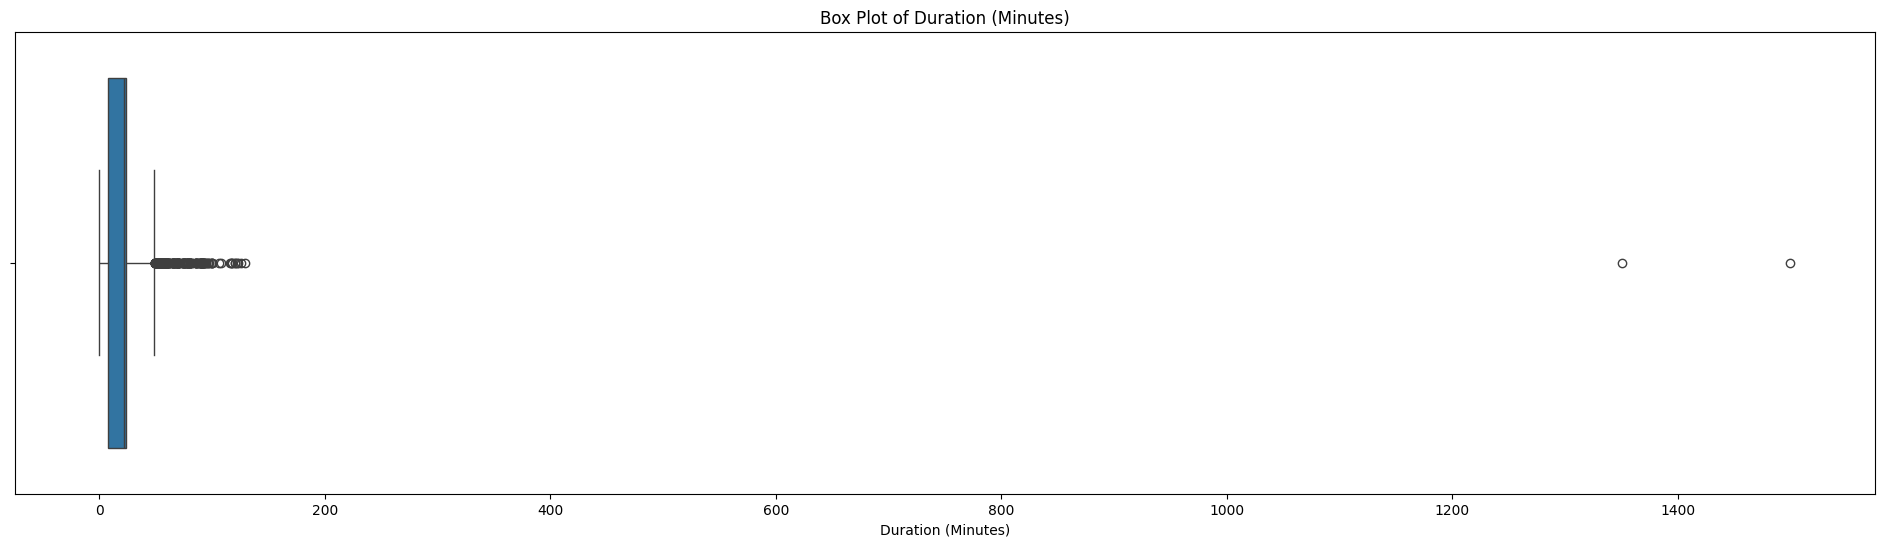

In [29]:
# Call convertDuration(duration) for all rows in "Duration" Column
anime_cleaned_df['Duration_Minutes'] = anime_cleaned_df['Duration'].apply(convertDuration)

# Drop the Duration category from data frame
anime_cleaned_df = anime_cleaned_df.drop(['Duration'], axis=1)

plt.figure(figsize=(24, 6))
sb.boxplot(data=anime_cleaned_df, x='Duration_Minutes')
plt.title('Box Plot of Duration (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.show()

In [30]:
print(label_encoder.classes_)
print()
print(studios_df.dtypes)
print()
print(anime_cleaned_df.dtypes)

['4-koma manga' 'Book' 'Card game' 'Game' 'Light novel' 'Manga'
 'Mixed media' 'Music' 'Novel' 'Original' 'Other' 'Picture book' 'Radio'
 'Unknown' 'Visual novel' 'Web manga' 'Web novel']

anime_id             int64
Name                object
100studio            int64
10Gauge              int64
1IN                  int64
                     ...  
team Yamahitsuji     int64
teamKG               int64
trenova              int64
ufotable             int64
yell                 int64
Length: 924, dtype: object

anime_id                     int64
Name                        object
English name                object
Score                      float64
Synopsis                    object
Type                        object
Episodes                    object
Aired                       object
Premiered                   object
Status                      object
Source                      object
Rating                      object
Rank                        object
Popularity                   in

In [35]:
# Sort the DataFrame by 'Duration_Minutes' in descending order
sorted_df = anime_cleaned_df.sort_values(by='Duration_Minutes', ascending=False)

# Display the sorted DataFrame
print(sorted_df)

       anime_id                                               Name  \
24801     55604              Castlevania (Netflix animated series)   
24501     55231                          Beyblade Burst QuadStrike   
18544     45042                                  Lengxue Kuang Yan   
2685       2952        Final Fantasy VII: Advent Children Complete   
14455     37892                                         Shigutsman   
...         ...                                                ...   
24886     55717  Dekisokonai to Yobareta Motoeiyuu wa Jikka kar...   
24889     55720                                  Tensura × Genyoha   
24900     55731                                        Wu Nao Monu   
24901     55732                                Bu Xing Si: Yuan Qi   
24902     55733                                        Di Yi Xulie   

          English name  Score  \
24801      Castlevania    NaN   
24501             None    NaN   
18544             None    NaN   
2685              None   7.

##### Cleaning - "Ratings" Column, Use Label Encoder to convert into numerical categorical data.

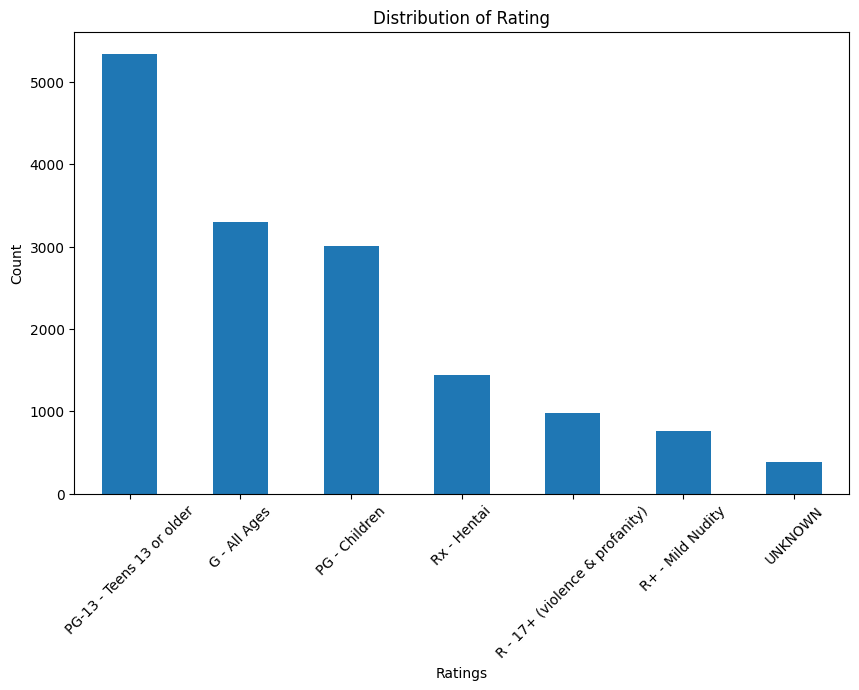

In [31]:
plt.figure(figsize=(10, 6))
anime_cleaned_df['Rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [32]:
# Convert Ratings to Numerical Categorical Data to represent the Age Rating
# Initialize Label Encoder from sklearn for Source
anime_cleaned_df['Rating Code'] = label_encoder.fit_transform(anime_cleaned_df['Rating'])
print(label_encoder.classes_)

# Fill the UNKNOWN values of Rating/Rating Code with the Mode
ratingMode = anime_cleaned_df['Rating Code'].mode()[0] # Get the Mode
anime_cleaned_df['Rating Code'] = anime_cleaned_df['Rating Code'].replace(6, ratingMode)

# Drop the Rating Column from data frame
anime_cleaned_df = anime_cleaned_df.drop(['Rating'], axis=1)

['G - All Ages' 'PG - Children' 'PG-13 - Teens 13 or older'
 'R - 17+ (violence & profanity)' 'R+ - Mild Nudity' 'Rx - Hentai'
 'UNKNOWN']


In [33]:
# Filter rows where 'Rating Code' is 6
filtered_df = anime_cleaned_df[anime_cleaned_df['Rating Code'] == 6]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Source,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code


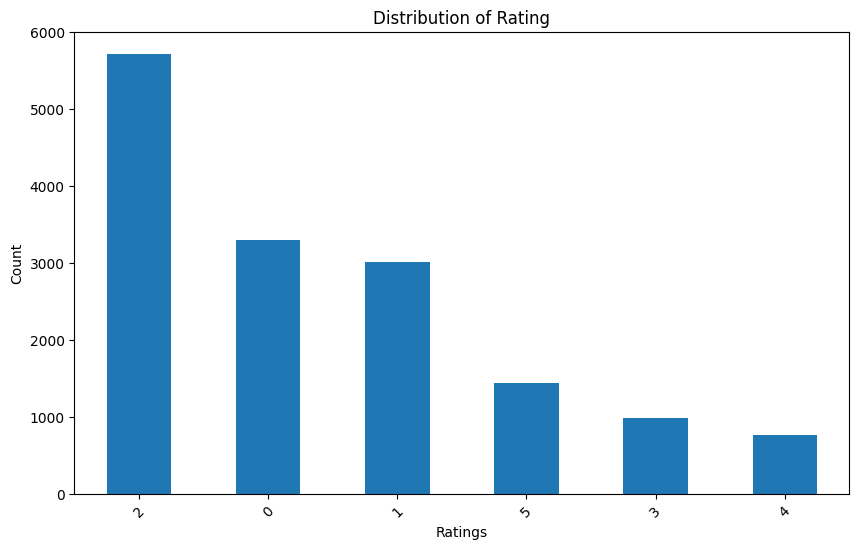

In [34]:
plt.figure(figsize=(10, 6))
anime_cleaned_df['Rating Code'].value_counts().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [36]:
print(anime_cleaned_df.dtypes)
anime_cleaned_df.head()

anime_id                     int64
Name                        object
English name                object
Score                      float64
Synopsis                    object
Type                        object
Episodes                    object
Aired                       object
Premiered                   object
Status                      object
Source                      object
Rank                        object
Popularity                   int64
Favorites                    int64
Scored By                   object
Members                      int64
Image URL                   object
Start Date          datetime64[ns]
End Date            datetime64[ns]
Status Code                  int32
Source Code                  int32
Duration_Minutes           float64
Rating Code                  int32
dtype: object


,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Source,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Original,41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Manga,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,Original,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,Manga,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,Manga,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,"Apr 4, 2023 to ?",UNKNOWN,Finished Airing,Web manga,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
24895,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,Web manga,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
24900,55731,Wu Nao Monu,None,NaN,<NA>,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,Web manga,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,2023-07-04,NaT,2,15,NaN,2
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,Web novel,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


In [37]:
# Drop Cleaned Columns that are Represented in a New Column Variable
anime_cleaned_df = anime_cleaned_df.drop(['Aired', 'Status', 'Source'], axis=1)

In [38]:
anime_cleaned_df.head()

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,spring 1998,41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,spring 1998,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,summer 2002,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,fall 2004,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,spring 2005,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
24895,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
24900,55731,Wu Nao Monu,None,NaN,<NA>,ONA,15.0,UNKNOWN,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,2023-07-04,NaT,2,15,NaN,2
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


##### Cleaning - "Rank" Column

In [39]:
# Clean Up "Rank" Column & Values - 4612 Unknowns, 187 Rank 0 (Invalid) // The lower the better.

anime_cleaned_df['Rank'] = anime_cleaned_df['Rank'].replace("UNKNOWN", np.nan) # Replace "Unknown" w/ NaN

# Convert column to float first to handle NaN
anime_cleaned_df['Rank'] = anime_cleaned_df['Rank'].astype('float')

rank_median = anime_cleaned_df['Rank'].median()
anime_cleaned_df['Rank'] = anime_cleaned_df['Rank'].fillna(rank_median)

In [40]:
# Convert column to float first to handle NaN
anime_cleaned_df['Rank'] = anime_cleaned_df['Rank'].astype('int')

# Fill data rows with Rank 0 with more meaningful rank value as these 187 rows are unlikely to be accurate data - appending to the end of the ranked list in increasing order.
rank_zero_df = anime_cleaned_df[anime_cleaned_df['Rank'] == 0].copy()
non_zero_rank_df = anime_cleaned_df[anime_cleaned_df['Rank'] != 0]

# Process the new ranks for rows with Rank = 0.
max_rank = non_zero_rank_df['Rank'].max()
rank_zero_df['Rank'] = range(max_rank+1, max_rank+1 + len(rank_zero_df))

# Combine back the dataframes
anime_cleaned_df = pd.concat([non_zero_rank_df, rank_zero_df], ignore_index=True)

anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,spring 1998,41,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
1,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,spring 1998,328,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
2,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,summer 2002,2764,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
3,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,fall 2004,4240,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
4,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,spring 2005,688,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15201,55724,Beauty and the Brawn,None,NaN,Haeun is a nobleman who falls hard for Dullseh...,ONA,6.0,UNKNOWN,20179,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1269/...,2023-05-16,NaT,1,5,5.0,2
15202,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,UNKNOWN,20180,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
15203,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,UNKNOWN,20181,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
15204,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,UNKNOWN,20182,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


##### Cleaning - "Popularity" Column

In [41]:
# Clean Up "Popularity" Column & Values - 187 Rank 0 (Invalid) // The lower the better.

# Fill data rows with Rank 0 with more meaningful rank value as these 187 rows are unlikely to be accurate data - appending to the end of the popularity list in increasing order.
popularity_zero_df = anime_cleaned_df[anime_cleaned_df['Popularity'] == 0].copy()
non_zero_popularity_df = anime_cleaned_df[anime_cleaned_df['Popularity'] != 0]

# Process the new ranks for rows with Rank = 0.
max_popularity = non_zero_popularity_df['Popularity'].max()
popularity_zero_df['Popularity'] = range(max_popularity+1, max_popularity+1 + len(popularity_zero_df))

# Combine back the dataframes
anime_cleaned_df = pd.concat([non_zero_popularity_df, popularity_zero_df], ignore_index=True)
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,spring 1998,41,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
1,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,spring 1998,328,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
2,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,summer 2002,2764,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
3,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,fall 2004,4240,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
4,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,spring 2005,688,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15201,55724,Beauty and the Brawn,None,NaN,Haeun is a nobleman who falls hard for Dullseh...,ONA,6.0,UNKNOWN,20179,24799,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1269/...,2023-05-16,NaT,1,5,5.0,2
15202,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,UNKNOWN,20180,24800,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
15203,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,UNKNOWN,20181,24801,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
15204,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,UNKNOWN,20182,24802,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


In [42]:
# "Favorites", "Members" and "Image URL" columns seems clean - no need for further cleansing. 0 is valid data, indicating no users added to their favorites on MyAnimeList
# To clean up "Score", "Episodes" and "Scored By"

##### Cleaning - "Scored By" Column,

In [43]:
# Convert "Scored By" to Integer and replace Unknown with NaN first.
anime_cleaned_df['Scored By'] = anime_cleaned_df['Scored By'].replace("UNKNOWN", np.nan) # Replace "Unknown" w/ NaN
# Convert column to int64
anime_cleaned_df['Scored By'] = anime_cleaned_df['Scored By'].astype('float64')

print(anime_cleaned_df.dtypes)

anime_id                     int64
Name                        object
English name                object
Score                      float64
Synopsis                    object
Type                        object
Episodes                    object
Premiered                   object
Rank                         int64
Popularity                   int64
Favorites                    int64
Scored By                  float64
Members                      int64
Image URL                   object
Start Date          datetime64[ns]
End Date            datetime64[ns]
Status Code                  int32
Source Code                  int32
Duration_Minutes           float64
Rating Code                  int32
dtype: object


##### Cleaning - "Score" Column, fill in based on other variables

In [44]:
filtered_df = anime_cleaned_df[anime_cleaned_df['Score'].isna()]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
1265,1739,Shibawanko no Wa no Kokoro,None,NaN,Based on a japanese children`s book by Yoshie ...,TV,80.0,spring 2006,19660,13679,1,NaN,728,https://cdn.myanimelist.net/images/anime/11/70...,2006-04-05,2007-03-14,1,13,2.0,0
1352,1863,Silk Road Shounen Yuuto,None,NaN,"When a boy Yuto visits Qinghai in China, he is...",TV,26.0,fall 2006,19912,13981,0,NaN,657,https://cdn.myanimelist.net/images/anime/1/186...,2006-09-16,2007-03-24,1,13,20.0,2
1917,2701,Susie-chan to Marvy,Little Susie and Marvy,NaN,<NA>,TV,104.0,spring 1999,12706,16212,0,NaN,374,https://cdn.myanimelist.net/images/anime/10/36...,1999-04-05,2000-02-03,1,13,15.0,2
1924,2708,Wankorobee,None,NaN,<NA>,TV,26.0,fall 1996,13327,16545,0,NaN,348,https://cdn.myanimelist.net/images/anime/11/36...,1996-10-06,1997-03-30,1,9,15.0,0
1942,2735,Mugen Senki Portriss,None,NaN,"In a raving world, legendary knights stood up....",TV,52.0,spring 2003,18320,14460,1,NaN,567,https://cdn.myanimelist.net/images/anime/1627/...,2003-04-05,2004-03-27,1,13,25.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15201,55724,Beauty and the Brawn,None,NaN,Haeun is a nobleman who falls hard for Dullseh...,ONA,6.0,UNKNOWN,20179,24799,0,NaN,0,https://cdn.myanimelist.net/images/anime/1269/...,2023-05-16,NaT,1,5,5.0,2
15202,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,UNKNOWN,20180,24800,0,NaN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
15203,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,UNKNOWN,20181,24801,0,NaN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
15204,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,UNKNOWN,20182,24802,0,NaN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


                     Score  Scored By
Score             1.000000   0.373575
Members           0.416495   0.989107
Scored By         0.373575   1.000000
Favorites         0.270604   0.783793
Duration_Minutes  0.181384   0.050788
anime_id         -0.002458   0.040556
Rating Code      -0.011246   0.027384
Status Code      -0.044107   0.020587
Source Code      -0.236661  -0.135472
Popularity       -0.673298  -0.402473
Rank             -0.914036  -0.366693


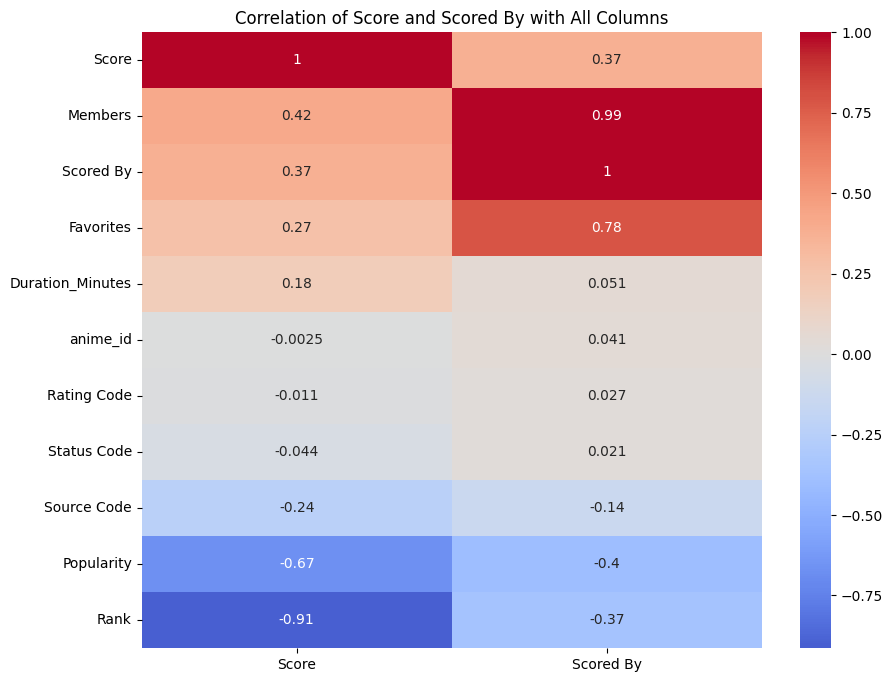

In [45]:
# Check the Correlation of "Score" and "Scored By" with other columns
numeric_df = anime_cleaned_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Display correlations specifically for 'Score' and 'Scored By' with all other columns
score_correlations = correlation_matrix[['Score', 'Scored By']].sort_values(by='Score', ascending=False, na_position='last')
print(score_correlations)

plt.figure(figsize=(10, 8))
sb.heatmap(score_correlations, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Score and Scored By with All Columns")
plt.show()

In [46]:
#imputer = KNNImputer(n_neighbors=5)
#anime_cleaned_df[['Score', 'Scored By']] = imputer.fit_transform(anime_cleaned_df[['Score', 'Scored By', 'Members', 'Favorites', 'Popularity']])

In [47]:
# Use Multivariate Imputation by Chained Equations (MICE) to fill in the missing data of Score & Scored By
# Useful for UNKNOWN or Missing Data for multiple columns, considers the relationships between features.
# Iterative, Statistical - Fill through other variables in the dataset. 
# Missing Values filled one-by-one, and it iterates.
# Start by filling missing values with initial guesses, like mean/median for column with missing data.
# For features with missing data - this feature will be treated as target and other features as predictors.
# Regression Model built to predict missing values in the target feature based on other features
# Use the model to fill the missing values, process repeated in cyclic manner.


# Create a new dataframe that consists of only numerical data with high correlation with Score, Scored By.
anime_numeric_df = anime_cleaned_df[['Score', 'Scored By', 'Members', 'Favorites', 'Popularity']]

# Initialize IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply the imputer to the selected columns to fill missing data. Replace NaN with imputed values derived from the model
anime_imputed_df = pd.DataFrame(imputer.fit_transform(anime_numeric_df), columns=anime_numeric_df.columns)

# Combine the results in the MICE df to anime cleaned df.
anime_cleaned_df['Score'] = anime_imputed_df['Score']
anime_cleaned_df['Scored By'] = anime_imputed_df['Scored By']

# Check for remaining NaN values.
print(anime_cleaned_df[['Score', 'Scored By']].isna().sum())


Score        0
Scored By    0
dtype: int64


In [48]:
# Round 'Score' to 1 decimal place and 'Scored By' to 0 decimal places (whole number)
anime_cleaned_df['Score'] = anime_cleaned_df['Score'].round(4)
anime_cleaned_df['Scored By'] = anime_cleaned_df['Scored By'].round(0)

# Convert Scored By to int64
anime_cleaned_df['Scored By'] = anime_cleaned_df['Scored By'].fillna(0)
anime_cleaned_df['Scored By'] = anime_cleaned_df['Scored By'].astype('Int64')

In [49]:
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.7500,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,spring 1998,41,43,78525,914193,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
1,6,Trigun,1,8.2200,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,spring 1998,328,246,15035,356739,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
2,7,Witch Hunter Robin,1,7.2500,Robin Sena is a powerful craft user drafted in...,TV,26.0,summer 2002,2764,1795,613,42829,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
3,8,Bouken Ou Beet,Beet the Vandel Buster,6.9400,It is the dark century and the people are suff...,TV,52.0,fall 2004,4240,5126,14,6413,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
4,15,Eyeshield 21,None,7.9200,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,spring 2005,688,1252,1997,86524,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15201,55724,Beauty and the Brawn,None,4.1994,Haeun is a nobleman who falls hard for Dullseh...,ONA,6.0,UNKNOWN,20179,24799,0,27079,0,https://cdn.myanimelist.net/images/anime/1269/...,2023-05-16,NaT,1,5,5.0,2
15202,55725,4 Week Lovers,None,4.1993,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,UNKNOWN,20180,24800,0,27081,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
15203,55726,"Die, Please!",None,4.1992,I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,UNKNOWN,20181,24801,0,27083,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
15204,55732,Bu Xing Si: Yuan Qi,Blader Soul,4.1990,<NA>,ONA,18.0,UNKNOWN,20182,24802,0,27085,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


In [50]:
print(anime_numeric_df['Scored By'].unique())

[9.14193e+05 3.56739e+05 4.28290e+04 ... 3.14500e+03 6.24700e+03
 4.21000e+02]


##### Cleaning - "Episodes" Column, fill UNKNOWN with the mode of episodes

In [51]:
# Clean Up "Episodes" - To fill titles with UNKNOWN number of episodes (511) with the mode of episodes, since many anime has standard formats and released in seasons.

# Replace Unknown with NAN
anime_cleaned_df['Episodes'] = anime_cleaned_df['Episodes'].replace("UNKNOWN", np.nan)

# Convert NaN to numeric
anime_cleaned_df['Episodes'] = pd.to_numeric(anime_cleaned_df['Episodes'], errors='coerce')

# Get the mode of 'Episodes' column
episodes_mode = anime_cleaned_df['Episodes'].mode()[0]

# Fill NaN values in 'Episodes' with the mode.
anime_cleaned_df['Episodes'] = anime_cleaned_df['Episodes'].fillna(episodes_mode)

# Convert to Int
anime_cleaned_df['Episodes'] = anime_cleaned_df['Episodes'].astype('int64')

##### Filling in unknowns:

Synopsis: Description not available 

Start Date: Earliest Date

End Date: if currently Airing, Today

Duration_Minutes: median

In [52]:
# Some final clean
print(anime_cleaned_df.isna().sum())  # Check remaining missing values
print(anime_cleaned_df['Episodes'].unique())  # Verify episodes encoding

# Fill missing Synopses with placeholder text
anime_cleaned_df['Synopsis'].fillna("Description not available.", inplace=True)

# Fill remaining titles with unknown start date with the earliest date.
anime_cleaned_df['Start Date'] = anime_cleaned_df.groupby('Type')['Start Date'].transform(lambda x: x.fillna(x.min()))

# Fill the end date of titles with "Currently Airing" status to today.
ongoing_mask = anime_cleaned_df['Status Code'] == anime_cleaned_df['Status Code'].max()  # Example: check for 'Currently Airing'
anime_cleaned_df.loc[ongoing_mask, 'End Date'] = pd.Timestamp('today')

# Fill the median of duration to titles with unknown durations
duration_median = anime_cleaned_df['Duration_Minutes'].median()
anime_cleaned_df['Duration_Minutes'].fillna(duration_median, inplace=True)

### Verify Cleaning
print(anime_cleaned_df.isna().sum())  # Check remaining missing values
print(anime_cleaned_df['Episodes'].unique())  # Verify episodes encoding

anime_id               0
Name                   0
English name        8638
Score                  0
Synopsis            3356
Type                   0
Episodes               0
Premiered              0
Rank                   0
Popularity             0
Favorites              0
Scored By              0
Members                0
Image URL              0
Start Date           765
End Date            6585
Status Code            0
Source Code            0
Duration_Minutes     416
Rating Code            0
dtype: int64
[  26   52  145   24   74  220    1  178   12   22   69   25    4   94
    5    3   13   23   43    6   50   47   51   49   39    8    7   75
   62   14   44   45   64  101   27  161    2  153   70   78   42   11
  167  150  366    9   16   38   48   10   76   40   20   37   41  112
  224  180  296  358   63  276   46   54   15   21   35  124   86  102
   36   67  291  110   29   55  201  142  109   34  136   32   73  114
   19  195   58  155   96  103  113  104  192  191  203   56 

### BASIC STATS - JORDAN

In [53]:
print("Data Types: ", type(anime_cleaned_df))
print("Data dims: ", anime_cleaned_df.shape)
print(anime_cleaned_df.dtypes)

# Merge anime_cleaned_df with producers_df
merged_df = pd.merge(anime_cleaned_df, producers_df, on=['anime_id', 'Name'], how='left')
print("Data dims: ", merged_df.shape)
#Merge anime_cleaned_df with studios_df
merged_df = pd.merge(merged_df, studios_df, on=['anime_id', 'Name'], how='left')
print("Data dims: ", merged_df.shape)
# Merge anime_cleaned_df with genres_df
merged_df = pd.merge(merged_df, genres_df, on=['anime_id', 'Name'], how='left')
print("Data dims: ", merged_df.shape)
print(merged_df.dtypes.to_string())

Data Types:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (15206, 20)
anime_id                     int64
Name                        object
English name                object
Score                      float64
Synopsis                    object
Type                        object
Episodes                     int64
Premiered                   object
Rank                         int64
Popularity                   int64
Favorites                    int64
Scored By                    Int64
Members                      int64
Image URL                   object
Start Date          datetime64[ns]
End Date            datetime64[ns]
Status Code                  int32
Source Code                  int32
Duration_Minutes           float64
Rating Code                  int32
dtype: object
Data dims:  (15206, 1332)
Data dims:  (15206, 2254)
Data dims:  (15206, 2275)
anime_id                                                      int64
Name                                                         obje

## Significance of Variables

field_classification below used for determining which Statistical test to apply: 

<table border="1">
  <thead>
    <tr>
      <th>Type</th>
      <th>Analysis Method</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Numerical</td>
      <td>Spearman Rank Correlation</td>
    </tr>
    <tr>
      <td>Categorical</td>
      <td>ANOVA</td>
    </tr>
    <tr>
      <td>One-hot</td>
      <td>Independent Sample t-test</td>
    </tr>
    <tr>
      <td>Multivalue (no longer present)</td>
      <td>Split into constituent one-hot variables</td>
    </tr>
  </tbody>
</table>


In [55]:
print(anime_cleaned_df.columns)
print(anime_cleaned_df.head())

Index(['anime_id', 'Name', 'English name', 'Score', 'Synopsis', 'Type',
       'Episodes', 'Premiered', 'Rank', 'Popularity', 'Favorites', 'Scored By',
       'Members', 'Image URL', 'Start Date', 'End Date', 'Status Code',
       'Source Code', 'Duration_Minutes', 'Rating Code'],
      dtype='object')
   anime_id                Name            English name  Score  \
0         1        Cowboy Bebop                       1   8.75   
1         6              Trigun                       1   8.22   
2         7  Witch Hunter Robin                       1   7.25   
3         8      Bouken Ou Beet  Beet the Vandel Buster   6.94   
4        15        Eyeshield 21                    None   7.92   

                                            Synopsis Type  Episodes  \
0  Crime is timeless. By the year 2071, humanity ...   TV        26   
1  Vash the Stampede is the man with a $$60,000,0...   TV        26   
2  Robin Sena is a powerful craft user drafted in...   TV        26   
3  It is the da

In [ ]:
# lookup table to classify fields with invalid values (na_List) and field type
field_classification = {
    'anime_id':{'type':'Work In Progress','na_List':[]},
    'Name':{'type':'Work In Progress','na_List':[]},
    'Score':{'type':'numerical','na_List':[]},
    'Synopsis':{'type':'Work In Progress','na_List':[]},
    'Type':{'type':'categorical','na_List':[]},
    'Episodes':{'type':'numerical','na_List':['UNKNOWN']},
    'Rank':{'type':'numerical','na_List':[0,'UNKNOWN']},
    'Popularity':{'type':'numerical','na_List':[0]},
    'Favorites':{'type':'numerical','na_List':[]},
    'Scored By':{'type':'numerical','na_List':["UNKNOWN"]},
    'Members':{'type':'numerical','na_List':[]},
    'Image URL':{'type':'Work In Progress','na_List':[]},
    'Start Date':{'type':'date','na_List':[]},
    'End Date':{'type':'date','na_List':[]},
    'Status Code':{'type':'categorical','na_List':["UNKNOWN"]},
    'Source Code':{'type':'categorical','na_List':[]},

    'Duration_Minutes':{'type':'numerical','na_List':["Unknown"]},
    'Rating Code':{'type':'categorical','na_List':["UNKNOWN"]},


    'Studios':{'type':'multiValue','na_List':[]},
    'Producers':{'type':'multiValue','na_List':[]},
    'Genres':{'type':'multiValue','na_List':[]},

    # Extra processing required to make this properly one-hot
    'English name':{'type':'one-hot','na_List':[]},

    # There are special cases for the following, hence the data below never gets looked up. Check analyse_field
    'Aired':{'type':'','na_List':[]},
    'Premiered':{'type':'','na_List':[]},

    # If need more examples use below 
    #'':{'type':'','na_List':[]},
}

#Remaining all one-hot variables
for i in anime_cleaned_df.columns:
    if i not in field_classification:
        field_classification[i]={'type':'one-hot','na_List':[]}

In [57]:
def one_hot_encode_multivalues(df, field,removeOld=False):
    """
    One-hot encodes a field with multiple values separated by commas.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the field to one-hot encode.
    - field (str): The name of the field to one-hot encode.
    
    Returns:
    - pd.DataFrame: The modified DataFrame with one-hot encoded columns for the specified field.
    """
    global field_classification
    
    # Collect new columns to add as a dictionary to avoid fragmentation
    new_columns = {}

    # Find unique values in the field by splitting entries by commas
    unique_values = set()
    df[field].dropna().apply(lambda x: unique_values.update([value.strip() for value in x.split(',')]))

    # Create a one-hot encoded column for each unique value
    for value in unique_values:
        col_name = f"{field}_{value}"
        new_columns[col_name] = df[field].apply(lambda x: 1 if x and value in x else 0)
        
        # Update the field classification if not already present
        if col_name not in field_classification:
            field_classification[col_name] = {'type': 'one-hot', 'na_List': []}

    # Concatenate new columns to the DataFrame at once to avoid fragmentation
    df = pd.concat([df, pd.DataFrame(new_columns)], axis=1)

    if removeOld:
        df.drop(field,axis=1, inplace=True)
    return df


In [58]:
def analyze_field(field, stat_p=0.05, printDetails=True, debug=False, df=None):
    """
    Analyzes whether a given field affects the 'Score' field significantly.

    Parameters:
    - field (str): The name of the field to analyze.
    - stat_p (float): The significance level (default is 0.05).
    - printDetails (bool): Whether to print detailed results (default is True).
    - debug (bool): If True, suppresses certain messages (default is False).
    - df (pd.DataFrame): Optional. If provided, uses this DataFrame; otherwise, uses the global anime_cleaned_df.

    Returns:
    - int: 1 if significant, 0 if not significant (when printDetails is False).
    """

    # Use the provided DataFrame or default to global anime_cleaned_df
    df = df if df is not None else anime_cleaned_df.copy()

    # Check if the field exists in the classification table
    if field not in field_classification:
        raise ValueError(f"Field '{field}' not found in the classification table. Please add it.")
    
    # Access field's classification and invalid values from the lookup table
    field_info = field_classification[field]
    field_type = field_info['type']
    na_List = field_info['na_List']

    # Drop rows containing invalid values in the specified field or NaN
    df = df[~df[field].isin(na_List)].dropna(subset=['Score', field])

    # Check if the field exists in the dataframe
    if field not in df.columns:
        raise ValueError(f"Field '{field}' not found in the dataframe.")

    # Case 1: Field type is "Work In Progress"
    if field_type == "Work In Progress":
        if not debug:
            print(f"The data in field '{field}' is currently marked as 'Work In Progress' and is hard to analyze.")
        return

    # Case 2: 'English name' field processing
    elif field == 'English name':
        df[field] = df[field].apply(lambda x: 0 if x == 0 else 1)
        field_type = 'one-hot'  # Ensure this is treated as one-hot for statistical test

    # Case 3: Special fields 'Aired' and 'Premiered'
    elif field in ['Aired', 'Premiered']:
        if not debug:
            print(f"For {field}, please check Question 1: Does Season of release affect the Score?")
        return

    # Case 4: Fields with multiple values (Studios, Source, Genres, Producers)
    elif field_type == 'multiValue':
        df = one_hot_encode_multivalues(df, field)
        results = []  # List to hold significance results for subcolumns

        # Recurse on new one-hot columns and collect the significance
        for new_col in [col for col in df.columns if col.startswith(f"{field}_")]:
            significance = analyze_field(new_col, stat_p, printDetails=False, debug=debug, df=df)  # Recurse without printing
            results.append({'new_col': new_col, 'significance': "Significant" if significance == 1 else "Not Significant"})

        # Convert results into a DataFrame and return it
        result_df = pd.DataFrame(results)
        return result_df

    # Case 5: Field type "date" with pattern extraction
    elif field_type == 'date':
        date_patterns = [r'([A-Za-z]{3} \d{1,2}, \d{4})', r'([A-Za-z]{3} \d{4})', r'(\d{4})']
        df['Extracted Date'] = df[field].apply(lambda x: next((match for pattern in date_patterns if (match := re.search(pattern, str(x)))), None))
        df['Year'] = df['Extracted Date'].apply(lambda x: int(x.group(0)[-4:]) if x else np.nan)
        df.dropna(subset=['Year'], inplace=True)
        correlation, p_value = stats.spearmanr(df['Year'], df['Score'])

        # Print or return results based on significance
        if printDetails:
            print(f"Spearman Rank Correlation for '{field}' and 'Score': correlation = {correlation:.3f}, p-value = {p_value:.2e}")
        return 1 if p_value < stat_p else 0

    # Statistical test execution based on the field type
    if field_type == 'categorical':
        grouped_data = [df[df[field] == value]['Score'] for value in df[field].unique()]
        f_stat, p_value = stats.f_oneway(*grouped_data)
        result_str = f"ANOVA for '{field}': F-statistic = {f_stat:.3f}, p-value = {p_value:.2e}"

    elif field_type == 'numerical':
        correlation, p_value = stats.spearmanr(df[field], df['Score'])
        result_str = f"Spearman Rank Correlation for '{field}': correlation = {correlation:.3f}, p-value = {p_value:.2e}"

    elif field_type == 'one-hot':
        # Ensure all values are strings or convert lists to a single string
        df[field] = df[field].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))
    
        # Now extract unique values
        unique_values = df[field].unique()
        
        if len(unique_values) != 2:
            raise ValueError(f"The field '{field}' must be a binary one-hot encoded field. Found unique values: {unique_values}")
        group_1, group_2 = [df[df[field] == val]['Score'] for val in unique_values]
        t_stat, p_value = stats.ttest_ind(group_1, group_2)
        result_str = f"T-test for '{field}': t-statistic = {t_stat:.3f}, p-value = {p_value:.2e}"
    
    else:
        print(f"Field type '{field_type}' not recognized. Please update the classification table.")
        return

    # Display results based on printDetails flag
    if printDetails:
        print(result_str)
        if p_value < stat_p:
            print(f"The field '{field}' significantly affects the 'Score'.")
        else:
            print(f"The field '{field}' does not significantly affect the 'Score'.")
    else:
        return 1 if p_value < stat_p else 0

In [59]:
# Not running this function while debugging other parts
def analyseAll():
    # Apply analyze_field to every field and present the results in a table format. Results are in next cell if you don't want to wait
    results = {}
    for col in anime_cleaned_df.columns:
        if col not in ("Studios","Producers"): #remove this line at your own risk, there are thousands of studios and producers
            try:
                if field_classification[col]['type'] == 'multiValue':
                    # Get the results DataFrame for multiValue fields
                    result_df = analyze_field(col, printDetails=False, debug=True)
                    if isinstance(result_df, pd.DataFrame):  # Check if the result is a DataFrame
                        # Append the results from the DataFrame to the main results
                        for _, row in result_df.iterrows():
                            results[row['new_col']] = row['significance']
                    
                    else:
                        # If analyze_field returns a single significance value, process as usual
                        significance = result_df
                        results[col] = "Significant" if significance == 1 else "Not Significant"
                    
                else:
                    significance = analyze_field(col, printDetails=False, debug=True)
                    results[col] = "Significant" if significance == 1 else "Not Significant"
            except ValueError as e:
                print(e)

    # Display results in a table
    result_df = pd.DataFrame(list(results.items()), columns=['Field', 'Significance'])
    print(result_df)

##### Summary of non Producer/Studio information

| **Field**               | **Significance**     |
|:------------------------:|:--------------------:|
| anime_id                | Not Significant      |
| Name                    | Not Significant      |
| English name            | Significant          |
| Score                   | Significant          |
| Genres_Mystery          | Significant          |
| Genres_Hentai           | Significant          |
| Genres_Boys Love        | Not Significant      |
| Genres_Avant Garde      | Significant          |
| Genres_Sports           | Significant          |
| Genres_Award Winning    | Significant          |
| Genres_Drama            | Significant          |
| Genres_Comedy           | Significant          |
| Genres_Supernatural     | Significant          |
| Genres_Horror           | Significant          |
| Genres_Fantasy          | Significant          |
| Genres_Girls Love       | Not Significant      |
| Genres_Gourmet          | Significant          |
| Genres_Suspense         | Significant          |
| Genres_Erotica          | Significant          |
| Genres_Adventure        | Significant          |
| Genres_UNKNOWN          | Significant          |
| Genres_Sci-Fi           | Significant          |
| Genres_Ecchi            | Not Significant      |
| Genres_Slice of Life    | Not Significant      |
| Genres_Romance          | Significant          |
| Genres_Action           | Significant          |
| Synopsis                | Not Significant      |
| Type                    | Significant          |
| Episodes                | Significant          |
| Aired                   | Not Significant      |
| Premiered               | Not Significant      |
| Status                  | Significant          |
| Source_Novel            | Significant          |
| Source_Card game       | Not Significant      |
| Source_Other            | Significant          |
| Source_Book             | Not Significant      |
| Source_4-koma manga     | Significant          |
| Source_Light novel      | Significant          |
| Source_Unknown          | Significant          |
| Source_Mixed media      | Not Significant      |
| Source_Visual novel     | Significant          |
| Source_Web novel        | Significant          |
| Source_Picture book     | Significant          |
| Source_Manga            | Significant          |
| Source_Original         | Significant          |
| Source_Radio            | Significant          |
| Source_Music            | Not Significant      |
| Source_Web manga        | Significant          |
| Source_Game             | Significant          |
| Duration                | Significant          |
| Rating                  | Significant          |
| Rank                    | Significant          |
| Popularity              | Significant          |
| Favorites               | Significant          |
| Scored By               | Significant          |
| Members                 | Significant          |
| Image URL               | Not Significant      |
| Start Air               | Significant          |
| End Air                 | Significant          |
| Action                  | Significant          |
| Adventure               | Significant          |
| Avant Garde             | Significant          |
| Award Winning           | Significant          |
| Boys Love               | Not Significant      |
| Comedy                  | Significant          |
| Drama                   | Significant          |
| Ecchi                   | Not Significant      |
| Erotica                 | Significant          |
| Fantasy                 | Significant          |
| Girls Love              | Not Significant      |
| Gourmet                 | Significant          |
| Hentai                  | Significant          |
| Horror                  | Significant          |
| Mystery                 | Significant          |
| Romance                 | Significant          |
| Sci-Fi                  | Significant          |
| Slice of Life           | Not Significant      |
| Sports                  | Significant          |
| Supernatural            | Significant          |
| Suspense                | Significant          |

##### Studios and Producers: Thousands of unique values

In [60]:
# field = "Studios"
# df = anime_cleaned_df.copy()

# # One-hot encode the multi-value column
# df = one_hot_encode_multivalues(df, field)

# # Iterate through the one-hot encoded columns
# for new_col in [col for col in df.columns if col.startswith(f"{field}_")]:
    
#     # Ensure values are 0 or 1 (binary), if not, handle the issue here
#     unique_values = df[new_col].unique()

#     # Check that the column is binary (contains only 0 and 1)
#     if len(unique_values) != 2 or not set(unique_values).issubset({0, 1}):
#         raise ValueError(f"The field '{new_col}' must be binary (0 or 1). Found unique values: {unique_values}")

#     # Group the data by the two unique values (0 and 1)
#     group_1, group_2 = [df[df[new_col] == val]['Score'] for val in unique_values]

#     # Display the first few rows of the groups (check their size)
#     print(f"Group 1 ({new_col} == {unique_values[0]}):")
#     print(group_1.head())
#     print(f"Group 2 ({new_col} == {unique_values[1]}):")
#     print(group_2.head())
#     break  # Only print for the first column


In [61]:
# runs slow so skip during development
# analyze_field("Producers")

Output for analyze_field("Producers")

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>new_col</th>
      <th>significance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Producers_Soyuzmultfilm</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Producers_Sony Music Solutions</td>
      <td>Significant</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Producers_Gentosha Comics</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Producers_Pyramid</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Producers_Sanctuary</td>
      <td>Significant</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>1230</th>
      <td>Producers_Omnibus Japan</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>1231</th>
      <td>Producers_dugout</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>1232</th>
      <td>Producers_Shin-Ei Animation</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>1233</th>
      <td>Producers_Hoods Entertainment</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>1234</th>
      <td>Producers_Kyotoma</td>
      <td>Not Significant</td>
    </tr>
  </tbody>
</table>
<p>1235 rows × 2 columns</p>
</div>

In [62]:
# runs slow so skip during development
# # analyze_field("Studios")

The output for analyse_field("Studios")

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>new_col</th>
      <th>significance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Studios_Studio Guts</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Studios_Twenty First</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Studios_Dynamic Planning</td>
      <td>Significant</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Studios_T-Rex</td>
      <td>Significant</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Studios_C-Station</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>802</th>
      <td>Studios_Mili Pictures</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>803</th>
      <td>Studios_Arcs Create</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>804</th>
      <td>Studios_Hoods Entertainment</td>
      <td>Not Significant</td>
    </tr>
    <tr>
      <th>805</th>
      <td>Studios_Sparkly Key Animation Studio</td>
      <td>Significant</td>
    </tr>
    <tr>
      <th>806</th>
      <td>Studios_Public &amp; Basic</td>
      <td>Not Significant</td>
    </tr>
  </tbody>
</table>
<p>807 rows × 2 columns</p>
</div>

## Model Training and user input

### Supporting Functions

In [63]:
# Filter only the significant fields based on the user-provided significance information
input_fields = [
    'English name', 'Score', 'Genres_Mystery', 'Genres_Hentai', 'Genres_Avant Garde',
    'Genres_Sports', 'Genres_Award Winning', 'Genres_Drama', 'Genres_Comedy',
    'Genres_Supernatural', 'Genres_Horror', 'Genres_Fantasy', 'Genres_Gourmet',
    'Genres_Suspense', 'Genres_Erotica', 'Genres_Adventure', 'Genres_UNKNOWN',
    'Genres_Sci-Fi', 'Type', 'Episodes', 'Status', 'Source_Novel', 'Source_Other',
    'Source_4-koma manga', 'Source_Light novel', 'Source_Unknown', 'Source_Visual novel',
    'Source_Web novel', 'Source_Picture book', 'Source_Manga', 'Source_Original',
    'Source_Game', 'Duration', 'Rating', 'Rank', 'Popularity', 'Favorites',
    'Scored By', 'Members', 'Start Air', 'End Air'
]

In [55]:
import numpy as np
import pandas as pd

def get_user_input():
    user_data = {
        "English name": [input("English Name: ") or np.nan],
        "Type": [input("Type: ") or np.nan],
        "Episodes": [int(input("Episodes: ") or 0)],
        "Status": [input("Status: ") or np.nan],
        "Duration": [input("Duration: ") or np.nan],
        "Rating": [input("Rating: ") or np.nan],
        "Rank": [float(input("Rank: ") or np.nan)],
        "Popularity": [int(input("Popularity: ") or 0)],
        "Favorites": [int(input("Favorites: ") or 0)],
        "Scored By": [int(input("Scored By: ") or 0)],
        "Members": [int(input("Members: ") or 0)],
        "Start Air": [input("Start Air: ") or np.nan],
        "End Air": [input("End Air: ") or np.nan]
    }
    
    # Genres and Source are multi-value fields
    print("Genres (separate by comma): Action, Award Winning, Sci-Fi...")
    user_data["Genres"] = [input("Genres: ") if input("Genres: ") else np.nan]
    print("Source (separate by comma): Manga, Novel, Light Novel...")
    user_data["Source"] = [input("Source: ") if input("Source: ") else np.nan]
    
    # Convert user_data to DataFrame and define NaNs
    user_df = pd.DataFrame(user_data).replace({"": np.nan, 0: np.nan})
    
    return user_df

#user_data_df = get_user_input()
#print(user_data_df)

In [ ]:
def print_unique_fields(df1, df2):
    # Get the column names of both DataFrames
    df1_columns = set(df1.columns)
    df2_columns = set(df2.columns)
    
    # Get columns that are only in df1 or only in df2 (symmetric difference)
    unique_to_df1 = df1_columns - df2_columns
    unique_to_df2 = df2_columns - df1_columns
    
    # Combine the unique fields and print them
    unique_fields = sorted(list(unique_to_df1.union(unique_to_df2)))
    
    print("Fields unique to one of the DataFrames:")
    for field in unique_fields:
        print(field)


### Decision Trees

In [ ]:
def treeTrain(df, userInput=None, test=False):
    # Prepare features and target variable
    y = df["Score"]
    X = df.drop(columns=["Score"])

    if test:
        # Split dataset into training and test set with random seed 42 for reproducibility
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
        model = DecisionTreeClassifier(max_depth=10, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate and display results
        y_pred = model.predict(X_test)
        mse = np.mean(np.square(np.array(y_pred) - np.array(y_test)))
        print(f"Test Mean Squared Error: {mse}")

        # Print the Classification Accuracy
        accuracy = model.score(X_test, y_test)
        print(f"The accuracy is {accuracy}")

        # Calculate the confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Create annotations with both counts and percentages
        total_samples = np.sum(conf_matrix)
        conf_matrix_percent = conf_matrix / total_samples * 100

        # Create an annotation matrix that includes both raw counts and percentages
        labels = np.array([f"{int(count)}\n({percent:.2f}%)" for count, percent in zip(conf_matrix.flatten(), conf_matrix_percent.flatten())])
        labels = labels.reshape(conf_matrix.shape)
        print(f"Classification Accuracy \t: {accuracy*100:.2f}%")
        print(f"True Positive Rate: {conf_matrix_percent[1,1]:.2f}%\nFalse Positive Rate: {conf_matrix_percent[0,0]:.2f}%")

        # Plot the Confusion Matrix with both raw numbers and percentages
        plt.figure(figsize=(8, 6))
        sb.heatmap(conf_matrix, annot=labels, fmt="", annot_kws={"size": 8}, cmap="Blues")

        # Add axis labels
        plt.xlabel('Prediction', fontsize=14)
        plt.ylabel('True', fontsize=14)

        # Set ticks dynamically based on unique values in y_test and y_pred
        unique_values = sorted(set(y_test).union(set(y_pred)))  # Union of unique values from both y_test and y_pred

        # Offset the ticks for xticks and yticks
        xticks_offset = 0.5  
        yticks_offset = 0.5  

        # Adjust tick positions by shifting them manually
        new_xticks = [tick + xticks_offset for tick in range(len(unique_values))]
        new_yticks = [tick + yticks_offset for tick in range(len(unique_values))]

        # Set the xticks and yticks with offset
        plt.xticks(ticks=new_xticks, labels=unique_values, fontsize=10)
        plt.yticks(ticks=new_yticks, labels=unique_values, fontsize=10)

        plt.show()
    else:
        model = DecisionTreeClassifier(max_depth=10, random_state=42)
        model.fit(X, y)
        print("userInput columns:", userInput.columns)

    # Plot the tree with the class names
    plt.figure(figsize=(20, 30))  
    plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(i) for i in model.classes_], 
            max_depth=10, proportion=False, fontsize=10, label='all')

    plt.show()

    if (not test):
        userInput = userInput[X.columns]
        print ("The predicted rank is",model.predict(userInput)[0])

def dropNanPlus(df,relevant_fields,processUser=False, reference_df=None):
    # Drop fields that are not significant or NaN
    if processUser==False:
        for field in relevant_fields:
            df = df[~df[field].isin(field_classification[field]['na_List'])].dropna(subset=['Score', field])

    for field in relevant_fields:
        if field_classification[field]['type'] in ('categorical', 'multiValue'):
            df = one_hot_encode_multivalues(df, field, removeOld=True)     

    # Make sure both user input and the database df have the same one-hot variables
    if processUser:
        for field in reference_df.columns:
            if field not in df.columns and field!="Score":
                df[field] = np.zeros(len(df))  # Add missing columns with zeros

    for dateField in relevant_fields:
        if dateField in ('Start Air','End Air'):
            date_patterns = [r'([A-Za-z]{3} \d{1,2}, \d{4})', r'([A-Za-z]{3} \d{4})', r'(\d{4})']
            df['Extracted Date'] = df[dateField].apply(lambda x: next((match for pattern in date_patterns if (match := re.search(pattern, str(x)))), None))
            df['Year'] = df['Extracted Date'].apply(lambda x: int(x.group(0)[-4:]) if x else np.nan)
            df.dropna(subset=['Year'], inplace=True)
            df.drop('Extracted Date',axis=1,inplace=True)
            df.drop(dateField,axis=1,inplace=True)

    if "English name" in relevant_fields:
        df["English name"] = df["English name"].apply(lambda x: 0 if x == 0 else 1)
    
    return df

# Main function
def train_significant_fields_model(skipInput=False):
    global anime_cleaned_df
    df = anime_cleaned_df.copy()  # Work with a copy of the global dataset
    
    if skipInput:
        user_data = pd.DataFrame({
            'English name': ['TestName'],
            'Type': ['TV'],
            'Episodes': [24],
            'Status': [np.nan],
            #'Duration': [73],
            #'Rating': ['R - 17+ (violence & profanity)'],
            'Rank': [345.0],
            'Popularity': [8000],
            'Favorites': [0],
            'Scored By': [10200],
            'Members': [0],
            'Start Air': [np.nan],
            'End Air': [np.nan],
            #'Genres': ['Action, Adventure, Comedy, Drama'],
            #'Source': ['Manga']
            })
    else:
        user_data = get_user_input()
        print("User data collected:", user_data)  
    
    user_data.dropna(axis=1, inplace=True)
    relevant_fields=list(user_data.keys())

    df = df[relevant_fields+['Score']]
    df['Score'] = df['Score'].round()

    df=dropNanPlus(df,relevant_fields)
    user_data=dropNanPlus(user_data,relevant_fields, processUser=True,reference_df=df)
    
    # Train the model with a decision tree
    treeTrain(df, user_data)  # Setting test=True to show evaluation and test results

train_significant_fields_model(skipInput=True) # Faster debugging

'''
Improvements to do: 
1. checkInput make it prompt properly
3. add comments via chatgpt
4. split these functions once done testing into different cells, add text cells description. 
'''

### Random Forest: Score V Duration

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split your data into features and target
X = anime_cleaned_df[['Duration_Minutes']]  # Ensure this column is numeric
y = anime_cleaned_df['Score']  # Target column for regression

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.7723408135682568
R-squared Score: 0.3841574637934979


### Random Forest: Episodes V Score

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split your data into features and target
X = anime_cleaned_df[['Episodes']]  # Ensure this column is numeric
y = anime_cleaned_df['Score']  # Target column for regression

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1.0543587547657711
R-squared Score: 0.1592844011355652


## Trends

### Random Forest: Score V Duration

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split your data into features and target
X = anime_cleaned_df[['Duration_Minutes']]  # Ensure this column is numeric
y = anime_cleaned_df['Score']  # Target column for regression

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.7723408135682568
R-squared Score: 0.3841574637934979


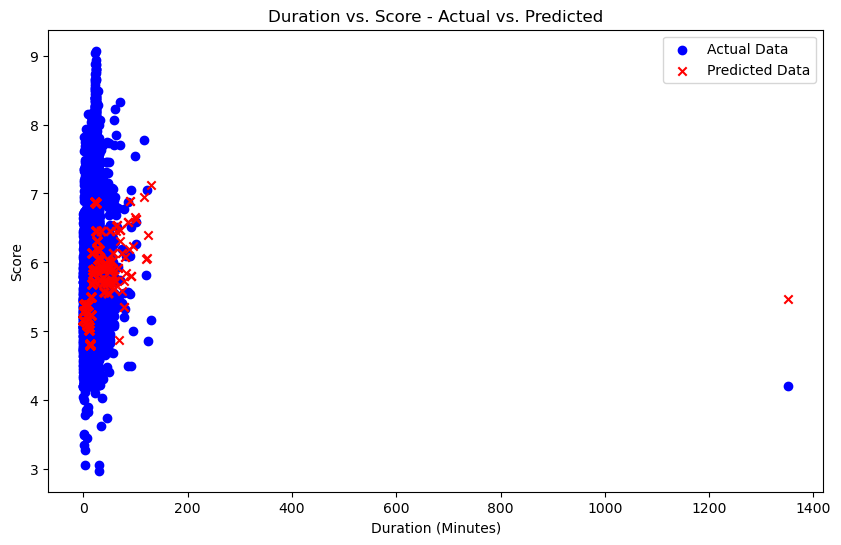

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted Data')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Score')
plt.title('Duration vs. Score - Actual vs. Predicted')
plt.legend()
plt.show()


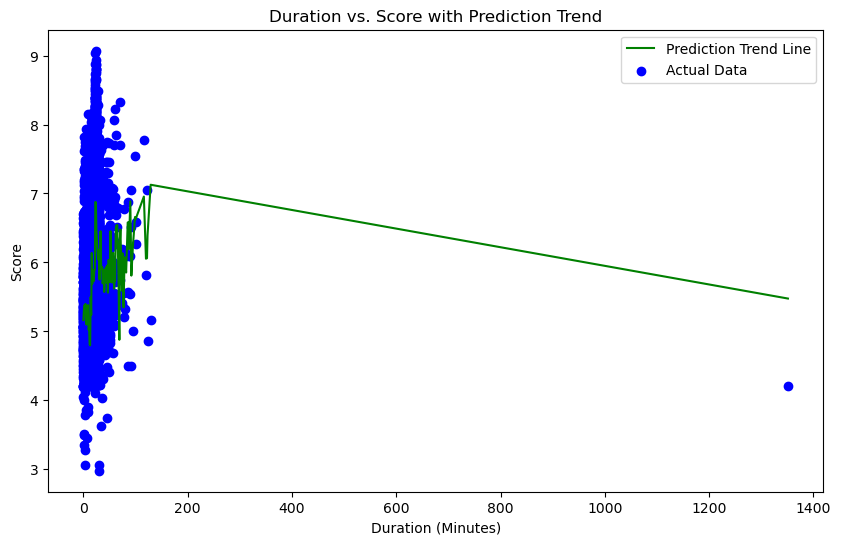

In [ ]:
import numpy as np

# Sort values for a smooth plot
sorted_indices = np.argsort(X_test.values.ravel())
X_test_sorted = X_test.values.ravel()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Line plot for predictions
plt.figure(figsize=(10, 6))
plt.plot(X_test_sorted, y_pred_sorted, color='green', label='Prediction Trend Line')
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Score')
plt.title('Duration vs. Score with Prediction Trend')
plt.legend()
plt.show()


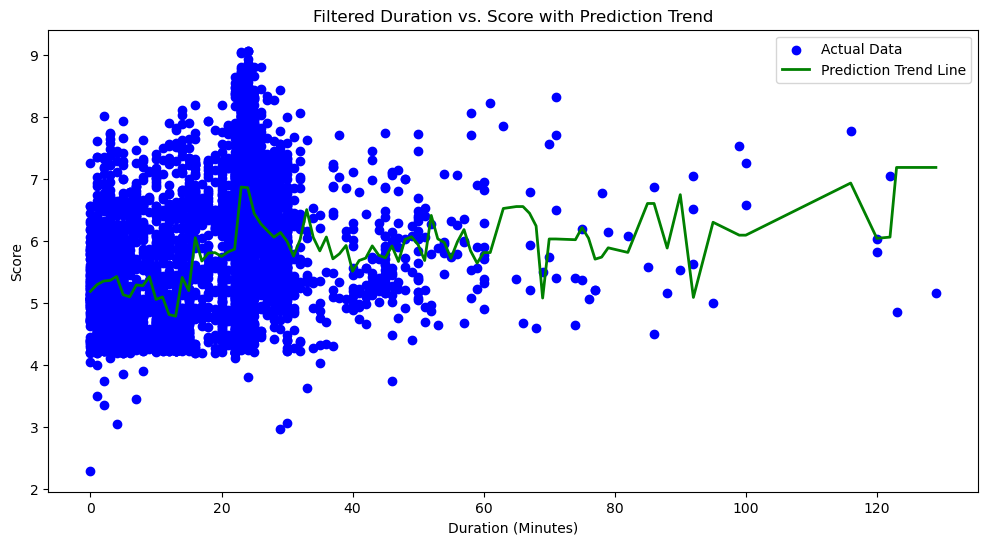

In [ ]:
# Define a threshold to filter out long durations (e.g., anything above 200 minutes)
threshold = 200  # Adjust this value based on your dataset
filtered_data = anime_cleaned_df[anime_cleaned_df['Duration_Minutes'] <= threshold]

# Split filtered data into features and target
X_filtered = filtered_data[['Duration_Minutes']]
y_filtered = filtered_data['Score']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Re-train the Random Forest Regressor on filtered data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Sort for smoother visualization
sorted_indices = np.argsort(X_test.values.ravel())
X_test_sorted = X_test.values.ravel()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the data and trend line
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test_sorted, y_pred_sorted, color='green', linewidth=2, label='Prediction Trend Line')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Score')
plt.title('Filtered Duration vs. Score with Prediction Trend')
plt.legend()
plt.show()


### Random Forest: Episodes V Score

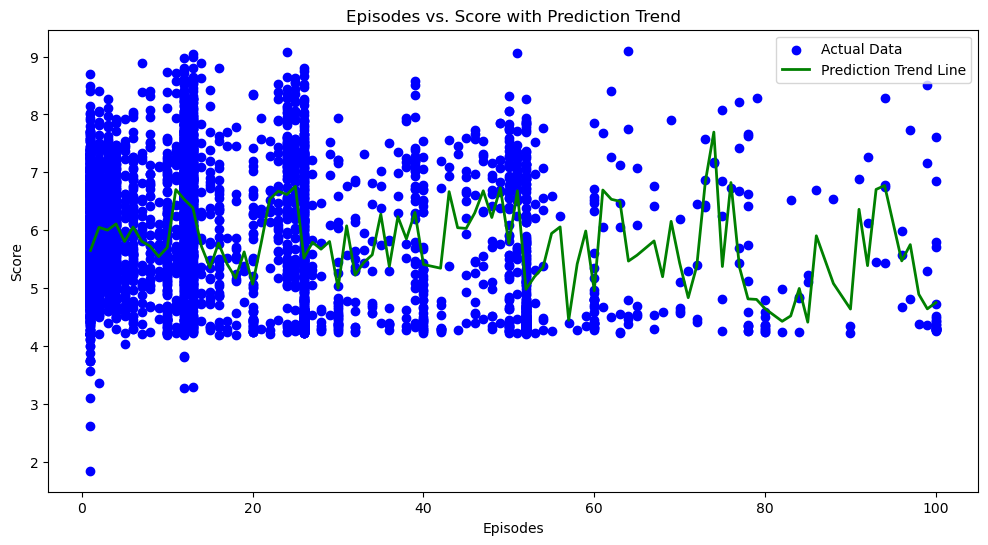

In [ ]:
# Define a threshold to filter out long episodes counts (e.g., anything above a certain number of episodes)
threshold = 100  # Adjust this value based on your dataset
filtered_data = anime_cleaned_df[anime_cleaned_df['Episodes'] <= threshold]

# Split filtered data into features and target
X_filtered = filtered_data[['Episodes']]
y_filtered = filtered_data['Score']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Re-train the Random Forest Regressor on filtered data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Sort for smoother visualization
sorted_indices = np.argsort(X_test.values.ravel())
X_test_sorted = X_test.values.ravel()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the data and trend line
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test_sorted, y_pred_sorted, color='green', linewidth=2, label='Prediction Trend Line')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title('Episodes vs. Score with Prediction Trend')
plt.legend()
plt.show()


In [ ]:
# Create episode range categories
bins = [0, 12, 24, 50, 100, float('inf')]
labels = ['Short (1-12)', 'Medium (13-24)', 'Long (25-50)', 'Very Long (51-100)', 'Extremely Long (100+)']
anime_cleaned_df['Episode_Category'] = pd.cut(anime_cleaned_df['Episodes'], bins=bins, labels=labels)

# Check the distribution
print(anime_cleaned_df['Episode_Category'].value_counts())


Episode_Category
Short (1-12)             8744
Long (25-50)             2517
Medium (13-24)           1988
Very Long (51-100)       1489
Extremely Long (100+)     468
Name: count, dtype: int64


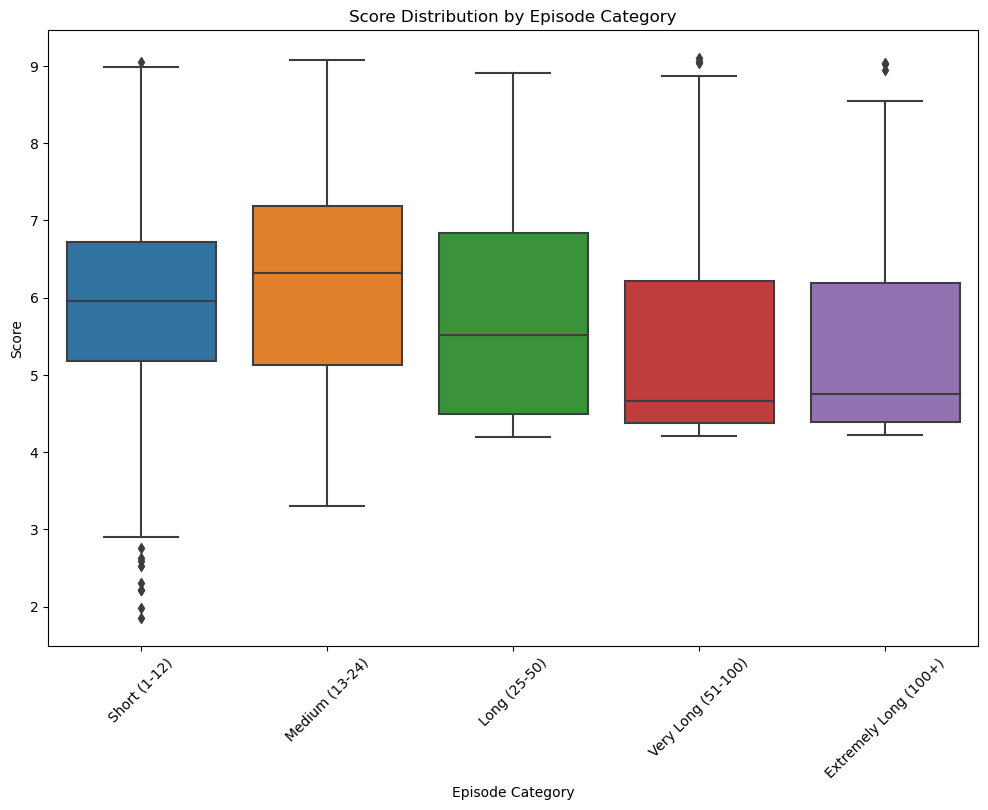

In [ ]:
plt.figure(figsize=(12, 8))
sb.boxplot(x='Episode_Category', y='Score', data=anime_cleaned_df)
plt.title('Score Distribution by Episode Category')
plt.xlabel('Episode Category')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


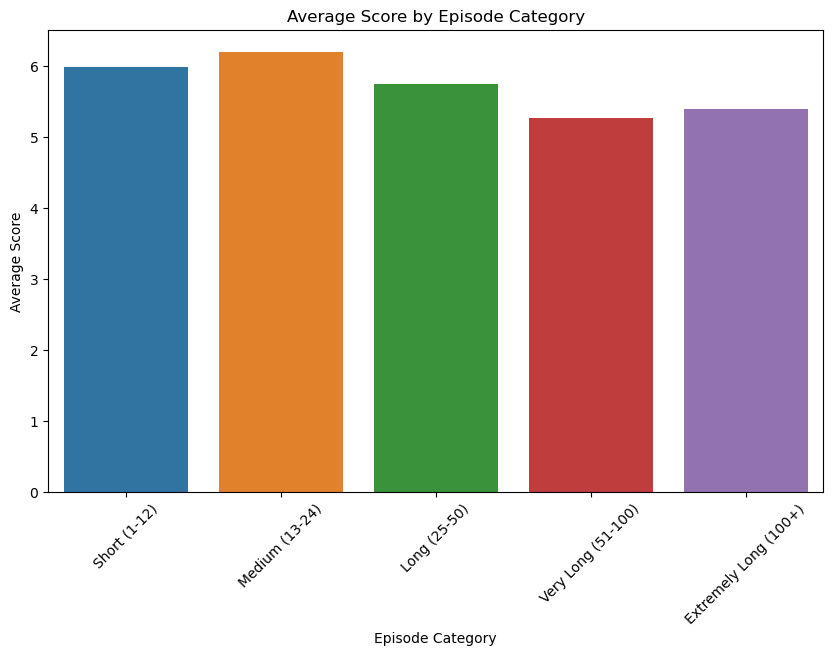

In [ ]:
avg_score_per_category = anime_cleaned_df.groupby('Episode_Category')['Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sb.barplot(x='Episode_Category', y='Score', data=avg_score_per_category)
plt.title('Average Score by Episode Category')
plt.xlabel('Episode Category')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


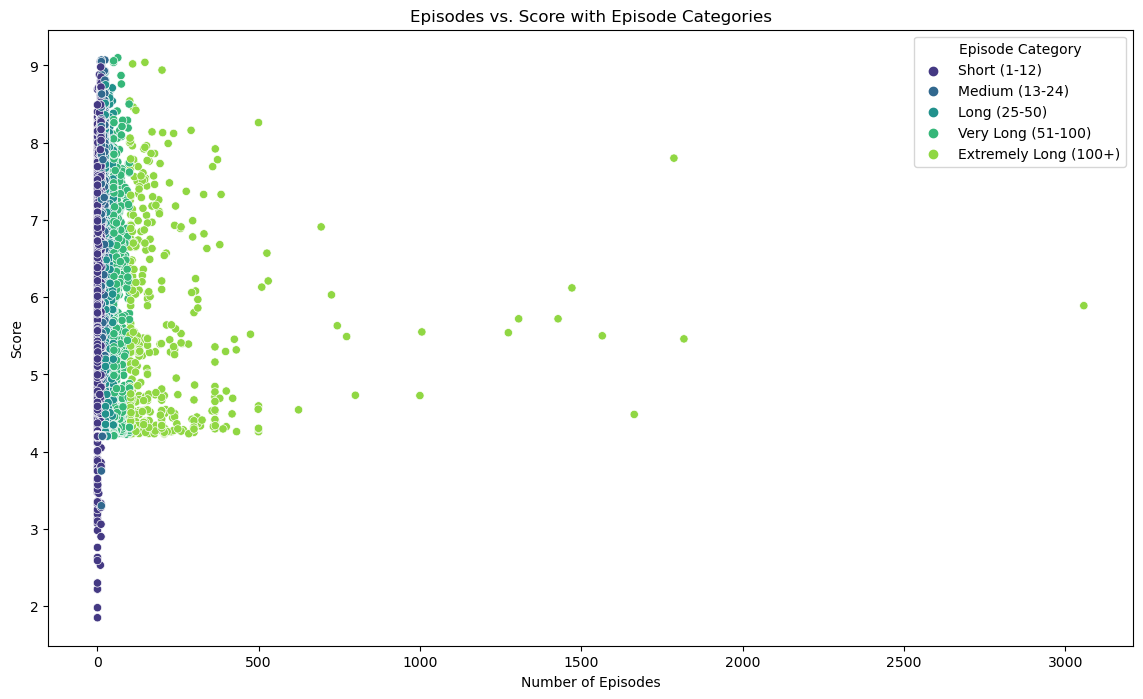

In [ ]:
plt.figure(figsize=(14, 8))
sb.scatterplot(x='Episodes', y='Score', hue='Episode_Category', data=anime_cleaned_df, palette='viridis')
plt.title('Episodes vs. Score with Episode Categories')
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.legend(title='Episode Category')
plt.show()


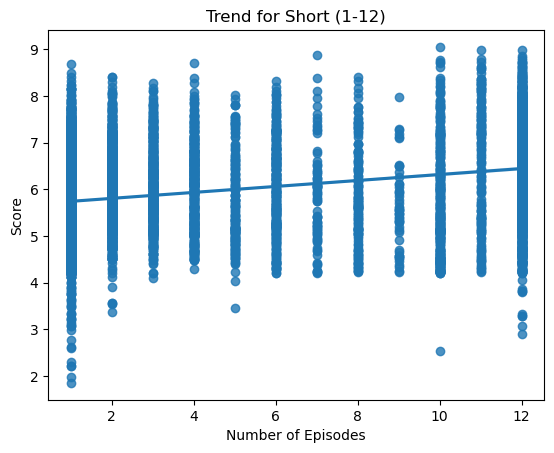

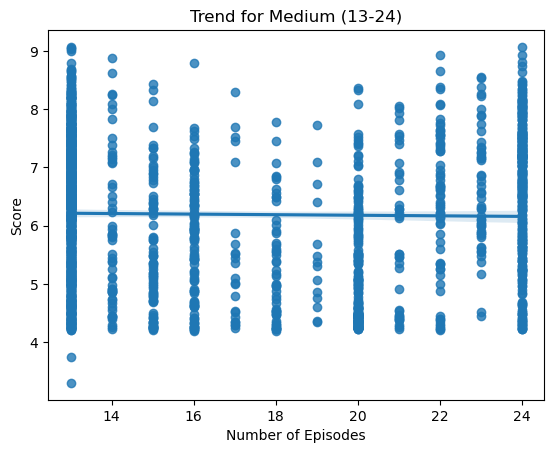

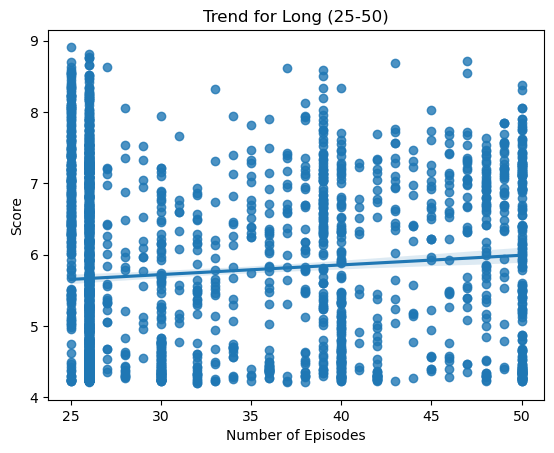

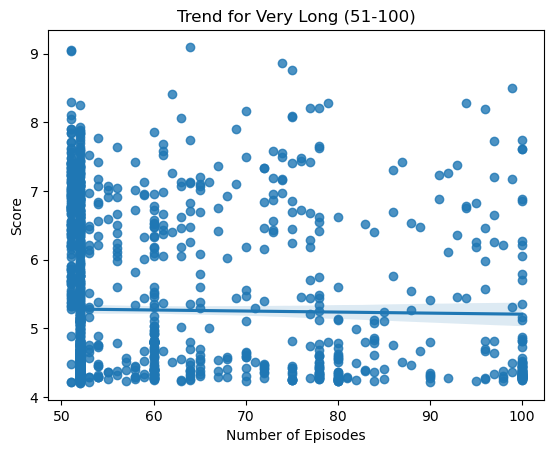

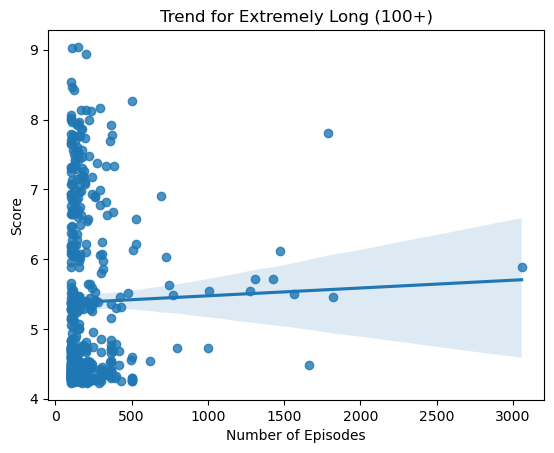

In [ ]:
for category in labels:
    subset = anime_cleaned_df[anime_cleaned_df['Episode_Category'] == category]
    if not subset.empty:
        sb.regplot(x='Episodes', y='Score', data=subset, label=category)
        plt.title(f'Trend for {category}')
        plt.xlabel('Number of Episodes')
        plt.ylabel('Score')
        plt.show()


### Score v Season - Scatter chart

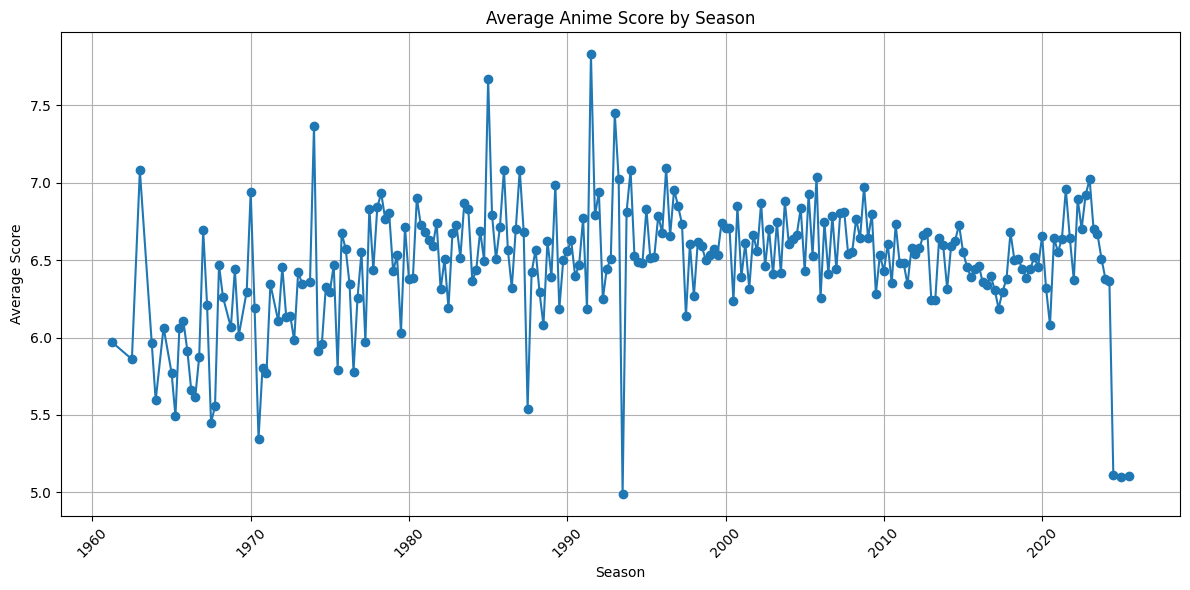

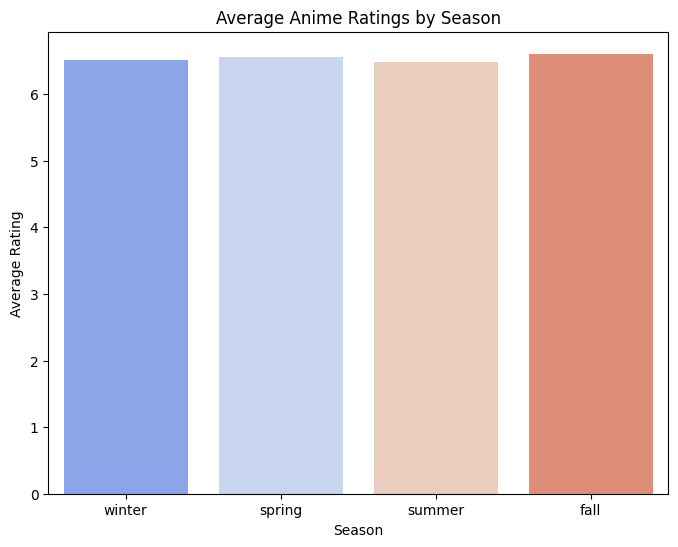

In [57]:
import scipy.stats as stats

# Create a copy of the anime_cleaned_df
anime_copy = anime_cleaned_df.copy()

# Function to extract season and year from the 'Premiered' column
def extract_season_and_year(value):
    try:
        season, year = value.split()
        return season, int(year)
    except (ValueError, AttributeError):
        return np.nan, np.nan

# Apply the extraction function on the copy
anime_copy[['Season', 'Year']] = anime_copy['Premiered'].apply(
    lambda x: pd.Series(extract_season_and_year(x))
)

# Drop rows with missing or NaN values in 'Score', 'Season', or 'Year' in the copy
anime_copy = anime_copy.dropna(subset=['Score', 'Season', 'Year'])

# Required for to pd._datetime to work correctly later
anime_copy['Year'] = anime_copy['Year'].astype('Int64')

# Group by Year and Season, then calculate the average score for each season in the copy
seasonal_avg_scores = (
    anime_copy.groupby(['Year', 'Season'])['Score']
    .mean()
    .reset_index()
    .sort_values(['Year', 'Season'], ascending=True)
)

# Map seasons to representative months
season_to_month = {
    'winter': '01',  # January
    'spring': '04',  # April
    'summer': '07',  # July
    'fall': '10'     # October
}

# Create a Date column by combining Year and mapped Month
seasonal_avg_scores['Month'] = seasonal_avg_scores['Season'].str.lower().map(season_to_month)
seasonal_avg_scores['Date'] = seasonal_avg_scores['Year'].astype(str) + '-' + seasonal_avg_scores['Month'] + '-01'

# Convert to datetime format
seasonal_avg_scores['Date'] = pd.to_datetime(seasonal_avg_scores['Date'], format='%Y-%m-%d', errors='coerce')

# Drop rows with invalid Date values in the copy
seasonal_avg_scores = seasonal_avg_scores.dropna(subset=['Date'])

# Sort Ascending dates
seasonal_avg_scores = seasonal_avg_scores.sort_values(by='Date', ascending=True)

# Plotting
if seasonal_avg_scores.empty:
    print("No data available for plotting. Please check the 'Premiered' and 'Score' fields for correct formatting.")
else:
    plt.figure(figsize=(12, 6))
    plt.plot(seasonal_avg_scores['Date'], seasonal_avg_scores['Score'], marker='o')
    plt.title('Average Anime Score by Season')
    plt.xlabel('Season')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Group by season, ignoring the year, and calculate the average score in the copy
seasonal_avg = anime_copy.groupby('Season')['Score'].mean().reindex(['winter', 'spring', 'summer', 'fall'])

# Plot the bar chart
plt.figure(figsize=(8, 6))
sb.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='coolwarm', hue=seasonal_avg.index)
plt.title('Average Anime Ratings by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()

del (anime_copy)

## Split into smaller containers to watch for trends, should state observations for the different containers

anime_cleaned_df.dtypes

genres_df.dtypes

Xgenre = genres_df[['Genre']]
y = anime_cleaned_df['Score']  # Replace with your target variable

### Trying to use genre for catergoricalboost

In [75]:
# Find the intersection of indices between the two DataFrames
common_indices = anime_cleaned_df.index.intersection(genres_df.index)

# Filter both DataFrames to keep only the common indices
anime_cleaned_df_catboost = anime_cleaned_df.loc[common_indices]
genres_df_catboost = genres_df.loc[common_indices]

# Verify that the lengths now match
print("Length of anime_cleaned_df:", len(anime_cleaned_df_catboost))
print("Length of genres_df:", len(genres_df_catboost))

# Now you can proceed with creating X and y
Xcat = genres_df_catboost[genre_columns]  # Use the filtered genres_df
y = anime_cleaned_df_catboost['Score']  # Ensure the target matches the filtered data


Length of anime_cleaned_df: 9463
Length of genres_df: 9463


In [76]:
from sklearn.model_selection import train_test_split

Xcat_train, Xcat_test, y_train, y_test = train_test_split(Xcat, y, test_size=0.3, random_state=42)


In [ ]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    task_type='GPU',  # Specify GPU usage
    devices='0'  # Optional: specify which GPU to use (e.g., '0' for the first GPU)
)


# Ensure columns are passed correctly
cat_features = list(range(len(genre_columns)))  # Using indices as cat_features

# Train CatBoost model
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=4, task_type='GPU', verbose=200)
catboost_model.fit(Xcat_train, y_train, cat_features=cat_features)

# Make predictions
y_pred_cat = catboost_model.predict(X_test)

# Evaluate the model
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Specify the categorical feature names or indices
cat_features = genre_columns  # If you prefer to use column names directly


# Train CatBoost model
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=200)
catboost_model.fit(Xcat_train, y_train, cat_features=cat_features)

# Make predictions
y_pred_cat = catboost_model.predict(X_test)

# Evaluate the model
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))


In [ ]:
from xgboost import XGBClassifier

# Create and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
